## Análise básica dos links do Spotify

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df3 = pd.read_csv("../data/data_3.csv")
df4 = pd.read_csv("../data/data_4.csv")
df5 = pd.read_csv("../data/data_5.csv")
df6 = pd.read_csv("../data/data_6.csv")


df = pd.concat([df3, df4, df5, df6], join='inner')

df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
0,MARCH,MARCH,https://open.spotify.com/track/2CNJMsnYnuOVog1...,track
1,MARCH,MARCH,https://track.adform.net/C/?bn=41279147%0A,other
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8059 entries, 0 to 2369
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SINCE_DATE   8059 non-null   object
 1   UNITIL_DATE  8059 non-null   object
 2   SPOTIFY_URL  8059 non-null   object
 3   TYPE_URL     8059 non-null   object
dtypes: object(4)
memory usage: 314.8+ KB


Coletando apenas URLS do Spotify

In [56]:
query_url = df["SPOTIFY_URL"].apply(lambda x : 1 if ("spotify" in x) else 0)

In [57]:
df.drop(query_url, inplace=True)

In [58]:
df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track
5,MARCH,MARCH,https://open.spotify.com/track/0M955bMOoilikPX...,track
6,MARCH,MARCH,https://open.spotify.com/track/6m5ucBSM6b5saQv...,track


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8051 entries, 2 to 2369
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SINCE_DATE   8051 non-null   object
 1   UNITIL_DATE  8051 non-null   object
 2   SPOTIFY_URL  8051 non-null   object
 3   TYPE_URL     8051 non-null   object
dtypes: object(4)
memory usage: 314.5+ KB


In [60]:
type_url = df.groupby("TYPE_URL").size().reset_index(name='COUNT').sort_values(["COUNT"], ascending=False)
type_url

,TYPE_URL,COUNT
4,track,5723
3,playlist,929
0,album,837
2,other,467
1,artist,95


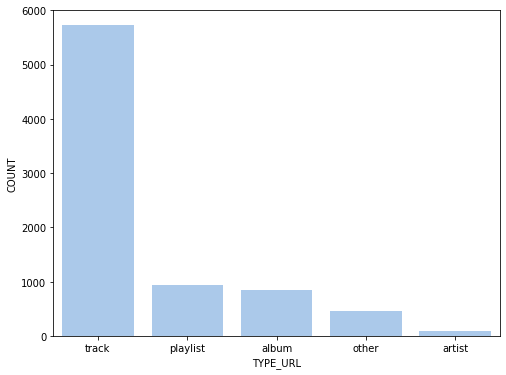

In [61]:
plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(x="TYPE_URL", y="COUNT", data=type_url,
            label="Total", color="b")
plt.show()

## Trabalhando com a API do Spotify

In [62]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [63]:
SPOTIPY_CLIENT_ID = "b391ac85c601490c97f5543085f9421c"
SPOTIPY_CLIENT_SECRET = "bc62935c90c242e0ab32ee08a2e5c404"

sp = spotipy.Spotify(client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET))

Coletando apenas as urls de música. Estas são identificadas pelo termo **track** na string.

In [67]:
track_df = df[ df["TYPE_URL"] == "track" ]
track_df.head()

,SINCE_DATE,UNITIL_DATE,SPOTIFY_URL,TYPE_URL
2,MARCH,MARCH,https://open.spotify.com/track/6X7H3JTAUGAL1rS...,track
3,MARCH,MARCH,https://open.spotify.com/track/11OwAR3GlBj9E35...,track
4,MARCH,MARCH,https://open.spotify.com/track/4258fiEd2cnCC5d...,track
5,MARCH,MARCH,https://open.spotify.com/track/0M955bMOoilikPX...,track
6,MARCH,MARCH,https://open.spotify.com/track/6m5ucBSM6b5saQv...,track


In [68]:
track_list = track_df["SPOTIFY_URL"].to_list()
track_list

['https://open.spotify.com/track/6X7H3JTAUGAL1rSwohnPBX?si=1r8su1tGRoKIM9Vb6Fqg2Q',
 'https://open.spotify.com/track/11OwAR3GlBj9E35Cznf7Lj?si=KvqjpjHeQsitUhBMMXFXEQ',
 'https://open.spotify.com/track/4258fiEd2cnCC5d6F7nfUz?si=VV0Cg6s4RH286aRZe98Y-w',
 'https://open.spotify.com/track/0M955bMOoilikPXwKLYpoi?si=NDcOZ3CpTF6q-5s--kFjXA',
 'https://open.spotify.com/track/6m5ucBSM6b5saQvwlrxDZh?si=7KCnmihVRsmjJfOK7QSzDw',
 'https://open.spotify.com/track/6smuFW92PmTdqKQnIoV6cn?si=Q5Pehfa5SfyLRZAy7Kvo7Q',
 'https://open.spotify.com/track/53jbdPQBaH6WaQvW0zmGBs?si=pE69ygTzQDuQonrEr7uLLw',
 'https://open.spotify.com/track/35689kbAwieHK4YNmwEisS?si=Y8YQdp7qQbC4uGnIO5EQ2g',
 'https://open.spotify.com/track/3hn7hzXAbrOjUXN8XNwy5M?si=cJ-EW0HIS7S0HMrg2vTI0g',
 'https://open.spotify.com/track/0OCm8tJMJCksjHowJF0KG1?si=Xf0FnLKuT2GFdjzaAaW8sw',
 'https://open.spotify.com/track/5NQJnRpJHRaupdegphntQT?si=Ci2CZOZiS6iOYnczaHRU_A',
 'https://open.spotify.com/track/0wGaciQY0aNrCuVbMWw728?si=AAIcUjeGSFGq6tvOs

In [71]:
list_spotify_data = []

cont = 1
for url in track_list:
    
    try:
        audio_features = sp.audio_features(url)[0]
        artist_info = sp.track(audio_features["id"])

        audio_features["popularity"] = artist_info["popularity"]
        audio_features["music_name"] = artist_info["name"]
        audio_features["artist"] = artist_info["artists"][0]["name"]

        list_spotify_data.append(audio_features)
        
        print(cont, "- URL ", url, "PROCESSADA")
        cont+=1
        
    except:
        print("Erro ao processar ", url)

1 - URL  https://open.spotify.com/track/6X7H3JTAUGAL1rSwohnPBX?si=1r8su1tGRoKIM9Vb6Fqg2Q PROCESSADA
2 - URL  https://open.spotify.com/track/11OwAR3GlBj9E35Cznf7Lj?si=KvqjpjHeQsitUhBMMXFXEQ PROCESSADA
3 - URL  https://open.spotify.com/track/4258fiEd2cnCC5d6F7nfUz?si=VV0Cg6s4RH286aRZe98Y-w PROCESSADA
4 - URL  https://open.spotify.com/track/0M955bMOoilikPXwKLYpoi?si=NDcOZ3CpTF6q-5s--kFjXA PROCESSADA
5 - URL  https://open.spotify.com/track/6m5ucBSM6b5saQvwlrxDZh?si=7KCnmihVRsmjJfOK7QSzDw PROCESSADA
6 - URL  https://open.spotify.com/track/6smuFW92PmTdqKQnIoV6cn?si=Q5Pehfa5SfyLRZAy7Kvo7Q PROCESSADA
7 - URL  https://open.spotify.com/track/53jbdPQBaH6WaQvW0zmGBs?si=pE69ygTzQDuQonrEr7uLLw PROCESSADA
8 - URL  https://open.spotify.com/track/35689kbAwieHK4YNmwEisS?si=Y8YQdp7qQbC4uGnIO5EQ2g PROCESSADA
9 - URL  https://open.spotify.com/track/3hn7hzXAbrOjUXN8XNwy5M?si=cJ-EW0HIS7S0HMrg2vTI0g PROCESSADA
10 - URL  https://open.spotify.com/track/0OCm8tJMJCksjHowJF0KG1?si=Xf0FnLKuT2GFdjzaAaW8sw PROCESSADA

82 - URL  https://open.spotify.com/track/6toDZSoqG5QUitFsoxavRy?si=xGexrwnTTduAHj2c1oF8jQ PROCESSADA
83 - URL  https://open.spotify.com/track/4ejyZ4uJEXUURcgKp1kP8v?si=BioIyBAPRp6D_fSefD_iTA&context=spotify%3Aplaylist%3A37i9dQZF1DX6aTaZa0K6VA PROCESSADA
84 - URL  https://open.spotify.com/track/1DAIfhsCnRDPhjOVH08LKX?si=NU82-pneR0a5fm8sGUns_w PROCESSADA
85 - URL  https://open.spotify.com/track/1Rzi70QifTTM7TLyQJaraj?si=MPzdkQ8nR-qF1GoXCITP8A PROCESSADA
86 - URL  https://open.spotify.com/track/2ZlIuFC94Gg3axq0XpMIm8?si=0mDJb7m1Ss2jWL-JbmzpNw PROCESSADA
87 - URL  https://open.spotify.com/track/6Fe3Flc9SjE03pqwD6PVQl?si=HD4V-gFwQCW1Qod8i--C4Q PROCESSADA
88 - URL  https://open.spotify.com/track/299QIwPJ2zsdF8doQkZaGd?si=-Cm8-frbQhqXXO80HbztOw PROCESSADA
89 - URL  https://open.spotify.com/track/2dMLwn8j56Z0IRbmspUzXm?si=-8dTfI7VQNGmYYxVWhexyQ PROCESSADA
90 - URL  https://open.spotify.com/track/3PqjHK8VGjQtUu7DTlKVyy?si=U02K2OjuRsayvtMk44No_Q PROCESSADA
91 - URL  https://open.spotify.com/trac

163 - URL  https://open.spotify.com/track/60dk9ui4K0xovicwrAV4Q1?si=WLsAv1jRSBCbHrOGmVL-Cg PROCESSADA
164 - URL  https://open.spotify.com/track/6x1QHtaaP3PLig7cIxaYim?si=7tqRzst8R-qYMMLRjD2EMQ PROCESSADA
165 - URL  https://open.spotify.com/track/0nsXChOHmBEH7QOul9VVBT?si=jGR_Rf2XTp2gPeIif0-moA PROCESSADA
166 - URL  https://open.spotify.com/track/1zdZMFYmPSFOGQZE0WFs6S?si=uUS5c-yrQp2Jb_JzdT_jzg PROCESSADA
167 - URL  https://open.spotify.com/track/1xvGuRbLxTkpb5UdUG7HME?si=fNEe-A7LROec-D4g6bfdlQ PROCESSADA
168 - URL  https://open.spotify.com/track/4pZ2aqPV39Gw3FuHrWKWnM?si=ovGRks9aQ8OqSEvuSqeUZA PROCESSADA
169 - URL  https://open.spotify.com/track/7vrnEKwazlPZiB5akfUk1m?si=KwCU5JpkS5Ks6lhGVBKQBA PROCESSADA
170 - URL  https://open.spotify.com/track/69InBLmrz7Cu0jBJk1dAgw?si=jfsCmpaJQeOQzc7c6ssDEg PROCESSADA
171 - URL  https://open.spotify.com/track/6GJnObvzy4CN3DaEP822V6?si=jERrdvhHRu2zx3z_91A16g PROCESSADA
172 - URL  https://open.spotify.com/track/2p35cz5mhXBN9iMy1HdHNM?si=alTkGEjVQryw8R

242 - URL  https://open.spotify.com/track/6aPUrLTe381i5pgE4jX94f?si=571mDnhtQHOAD8kyddQhbQ PROCESSADA
243 - URL  https://open.spotify.com/track/6e2pJqucDMxbp061B40r6O?si=GhGeTMuOSJ-ECJ1BvYT8dw PROCESSADA
244 - URL  https://open.spotify.com/track/0MZG9BTLqN6D6mBnyNQfUr?si=C1m10ettRDadcgFjuc358Q PROCESSADA
245 - URL  https://open.spotify.com/track/19oZRCn6gzQGdKRmv3XmNk?si=HNo9HjgPT2O5DXnS0Gx71Q PROCESSADA
246 - URL  https://open.spotify.com/track/565ih2CxMIQWEs6T8SoqzI?si=l3faI6KpSBaYe5xvF_iBow PROCESSADA
247 - URL  https://open.spotify.com/track/5kmBhthoaExSVO2X9YkKf2?si=1s6mbW4VSaSXE6xOGTM5FA PROCESSADA
248 - URL  https://open.spotify.com/track/4zFSvnPx59QKAi4QIqJD7e?si=uDinK2nHQiqzqatgoN5Ycg PROCESSADA
249 - URL  https://open.spotify.com/track/6oTHOCH3KS8KQqj3O1bxPv?si=ra6K1UmgSmm2t86xfZaczA PROCESSADA
250 - URL  https://open.spotify.com/track/3pCfT2WWBbGkJBTayTOvu3?si=zEUPmH9pQYeO5qLJ5EnJpg PROCESSADA
251 - URL  https://open.spotify.com/track/5WIWvFhxN681bGzkJm2a9G?si=osO61sECQkavNO

324 - URL  https://open.spotify.com/track/2j5BMw9J6rXTP4yWfVHP77?si=AfQ2sDC8SuyGagEY_Sibww PROCESSADA
325 - URL  https://open.spotify.com/track/6J212smZzpeOCYQ9DITMSC?si=OlDZyPgXSIOA2MF7ENGUzQ PROCESSADA
326 - URL  https://open.spotify.com/track/7BgNhufmVuEQjRo86YrsJR?si=wvgBsWrxSdm71-GCuDXB9Q PROCESSADA
327 - URL  https://open.spotify.com/track/0XuNVD6vWSHheSdYrv1NH3?si=L_ZvKdDeRea2_tSxl260vQ PROCESSADA
328 - URL  https://open.spotify.com/track/3ef3YOWfghFchOjcFumz2F?si=lOcW2RpoQqCPEsx_VMinPg PROCESSADA
329 - URL  https://open.spotify.com/track/0YPurGQSRUDTtIFUX3Nskc?si=w2i7-0i9RG-srqls1QwmJQ PROCESSADA
330 - URL  https://open.spotify.com/track/29f3ZHjc9pEveGXG7yb2R5?si=roZdEbMQRdKYmZIX_gQEXQ PROCESSADA
331 - URL  https://open.spotify.com/track/2vKzBwolmposY24HMEtiyT?si=-u5QEoZ8TE6MdjTLIYj5YA PROCESSADA
332 - URL  https://open.spotify.com/track/1GsEQy2L9RXHEgTufGWbs7?si=ias5YhmUQte551a6I-zPRg PROCESSADA
333 - URL  https://open.spotify.com/track/34b3EBDqiWqj2rL61YwzUQ?si=zU9XwAWER3-3E9

405 - URL  https://open.spotify.com/track/2qcfKvkTopzpSOeLW9AvyM?si=Ts0J8daxTPKVssivmgQJxw PROCESSADA
406 - URL  https://open.spotify.com/track/5q453TyHMg7pxYdNG9nufn?si=WpzbDneNRZmQgjOqeruZFQ PROCESSADA
407 - URL  https://open.spotify.com/track/44veqWw20yzAESXgIeoquW?si=FEzonLHZRem-_Y7DIFqZQw PROCESSADA
408 - URL  https://open.spotify.com/track/3gYCzJd1xUiXH0r7KzoIOA?si=ev35UEjLT-mJrxuIMFl1pA PROCESSADA
409 - URL  https://open.spotify.com/track/3djugNm18XH4pUAcP0tyhh?si=xrD-G5WCTJiN6OzYi3KG-Q PROCESSADA
410 - URL  https://open.spotify.com/track/0uv71i1waQbyRjZT86Fctu?si=2uhuKbBqTFqlMkSmS2-NRQ PROCESSADA
411 - URL  https://open.spotify.com/track/2KHfn2QIYXzywoeRnlH0M8?si=uZPylK9QQwKaeFl2nX5csw PROCESSADA
412 - URL  https://open.spotify.com/track/4BQ5P0dykPuoeTeCwr7nGH?si=ZvISVFybSDCaO6zDJTRA4g PROCESSADA
413 - URL  https://open.spotify.com/track/2LJFyZegquP5reY4Qi0egR?si=J0mobNLkRIetSb20bzXNIQ PROCESSADA
414 - URL  https://open.spotify.com/track/14SZFvU7e2xGmWBDkL7q19?si=i3Vqw1O_RZSi9i

486 - URL  https://open.spotify.com/track/30UrMLAtCnrHxCDxKktahR PROCESSADA
487 - URL  https://open.spotify.com/track/4QlzkaRHtU8gAdwqjWmO8n?si=hdc7ofVsREyiKhvKkMWK8A PROCESSADA
488 - URL  https://open.spotify.com/track/08v5zK2Tm7QSJ29K8e9SZP?si=W3lA0UsGQHOdpPH1KsMPvA PROCESSADA
489 - URL  https://open.spotify.com/track/1m9Iwfgxdpah5XQHhYf7Dj?si=lPc7i5E8T6SMmYo_kjdncA PROCESSADA
490 - URL  https://open.spotify.com/track/6IyHi4MSO4TkI3fIrelmfp?si=EBddY1_vQd6dlfwBZHHcOA PROCESSADA
491 - URL  https://open.spotify.com/track/2sYhw2UE3rjg0WFr2EMAAr?si=Jzz7madkS46y3z6RQM-Fig PROCESSADA
492 - URL  https://open.spotify.com/track/2ZEq4HT450Ye9IFGPTl9qV?si=_067m3sHTQSJCLPoOueoYg PROCESSADA
493 - URL  https://open.spotify.com/track/5dyAuEQrX4T8VVleze0CRG?si=4EUvVAJkSmWiZJYCb10pqA PROCESSADA
494 - URL  https://open.spotify.com/track/1BoDeH9mShHMX9NWzKSz4a?si=kqYdaincTWeDCxOLxh4YDw PROCESSADA
495 - URL  https://open.spotify.com/track/7w3pIUjz7BTTqj9uAws40m?si=43w0hJJPQpqA0ge7uwEdHg PROCESSADA
496 - 

567 - URL  https://open.spotify.com/track/5vtp8Fev1bni8ay0p23jKb?si=Kkdl82vuTgmYF2s3BqUCNg PROCESSADA
568 - URL  https://open.spotify.com/track/7yuIU4BOXUJ2Dad9SR513m?si=Bz5IrEj_R2edzZZmXjwB4Q PROCESSADA
569 - URL  https://open.spotify.com/track/7cd78Q5oRZQY8eEovY3Vg3?si=xuLip1UMQSiLIk6F9Tvr7A PROCESSADA
570 - URL  https://open.spotify.com/track/7FRL3XEmQNJ6JMVpxuLZ55?si=_LV7Z17XQHWrJvVuezwHsg PROCESSADA
571 - URL  https://open.spotify.com/track/7gieYWDeKhxmjBqNlEFRzS?si=Z24NDGoCR2KnTtFyptJhpQ PROCESSADA
572 - URL  https://open.spotify.com/track/6Mr7IQ4rYYPlx4drRXg2S2?si=LjTfD6zNSBy_ORKdKD6wsg PROCESSADA
573 - URL  https://open.spotify.com/track/2myQE9T8UAbl5u6Wg3UT2J?si=sRz0_6kMTu61ExhGmHXgUw PROCESSADA
574 - URL  https://open.spotify.com/track/5ZRQF5xsHlvr7FdYbhpCyB?si=ZTKTdWkRRced6LWNN6lmoA PROCESSADA
575 - URL  https://open.spotify.com/track/50eYEWdO9y2kKYWBjl5a5d?si=3ftplFHcTSyv5espZ-Kx4g PROCESSADA
576 - URL  https://open.spotify.com/track/08uaco3LeOg2kTDFh8bV8q?si=y2zocfx6TNWxtx

649 - URL  https://open.spotify.com/track/2CEgGE6aESpnmtfiZwYlbV?si=TSnDtcGmSSGStd2-WTwURQ PROCESSADA
650 - URL  https://open.spotify.com/track/7GhIk7Il098yCjg4BQjzvb PROCESSADA
651 - URL  https://open.spotify.com/track/7jYmFjZ8l40WFNVf9mhX9P?si=Xg-_ZAoyRbG-teneB5inqQ PROCESSADA
652 - URL  https://open.spotify.com/track/4COR2ZPEyUn0lsbAouRWxA?si=suKODzmRTE6u1bSozeYDrA PROCESSADA
653 - URL  https://open.spotify.com/track/4ZBxAQzSqxf09s3ef1KBf7?si=w_Oy_ceCTHSLMk8mtglF4g PROCESSADA
654 - URL  https://open.spotify.com/track/3NdHYXQK5gkFFEZvSMVVj6 PROCESSADA
655 - URL  https://open.spotify.com/track/3rchbdfMJ48si8MqFRs6wP?si=oQSiSU4TTNav1Yf3lcNQHg PROCESSADA
656 - URL  https://open.spotify.com/track/3ycgRTqMzjmLMhWfuIKIcm?si=H7kA1PKGQi-l-RVbMW5cVQ PROCESSADA
657 - URL  https://open.spotify.com/track/0ESdtt9cjGZUkUbaubSrv2?si=mzqrQuhpTRSOKC4FQffhCg PROCESSADA
658 - URL  https://open.spotify.com/track/5ytMMZRa8xuqb8Dy5RLD9l?si=-QIJzmkIQ8KbU3N_K5DNSQ PROCESSADA
659 - URL  https://open.spotify.

731 - URL  https://open.spotify.com/track/6ndQhhB4nz4yJRuQy8HhmL?si=WoYxmuckRUmpQKpH7szsrw PROCESSADA
732 - URL  https://open.spotify.com/track/3eAGbDUZWwc3FdiuRg2lJW?si=LKPOeVbWQQ-WtRFt9hHRGg PROCESSADA
733 - URL  https://open.spotify.com/track/0mx4mS0TOCdTJ90OA4MrVR?si=HIcPwD6uT1ycX90whB3AHw PROCESSADA
734 - URL  https://open.spotify.com/track/6g0o3FK5GqsjPV488bBtDj?si=oPpJ81b9TbaWsZ8YT5-X6g PROCESSADA
735 - URL  https://open.spotify.com/track/440YRjnYvTgjAFpagXf5CZ?si=idlh68-UQOiHc_YwVDA7Hg PROCESSADA
736 - URL  https://open.spotify.com/track/1FWsomP9StpCcXNWmJk8Cl?si=bX3hSr6mTIS-I2-7TwQd8g PROCESSADA
737 - URL  https://open.spotify.com/track/5x4WJOld875khBUDmXChi7?si=QN-kd5w2TuyjJMPViSrcJA PROCESSADA
738 - URL  https://open.spotify.com/track/5LOaKdW9D2Gl9neAN94NbR?si=QcjAVb4VSoGSZMdc5pcJ2g PROCESSADA
739 - URL  https://open.spotify.com/track/2IQ61J0AFfjnxBm4lQEU0W?si=_FM0IwKsSheDZezW2fR1Bw PROCESSADA
740 - URL  https://open.spotify.com/track/0LednrKRTlEFyEXw16t7uH?si=_aBYALnLQvW6pc

812 - URL  https://open.spotify.com/track/1wwM5H5qpU0PfHEDsFEiJW?si=_FWpWyxQRgur4-36Ab4gJQ PROCESSADA
813 - URL  https://open.spotify.com/track/3m2Zd230K68bC4Qe961d9p?si=s8sqxQ3aQpeAyKoCRpC36A PROCESSADA
814 - URL  https://open.spotify.com/track/1UVll7jjUlqSGxCZ6uXVaD?si=KyYhbD5MQ0q8csh3UzEm5w PROCESSADA
815 - URL  https://open.spotify.com/track/4E3Ptj0Yht06brmiqU3wJv?si=0EbVXKohRhKWOUy0H5Wn3Q PROCESSADA
816 - URL  https://open.spotify.com/track/1R3XJibBByTejWpXn291Xf PROCESSADA
817 - URL  https://open.spotify.com/track/1hVUaD7blIl2t951WL71M5?si=idkoUpAFSJalZIt8ORAJCw PROCESSADA
818 - URL  https://open.spotify.com/track/5l3VT6SxhmPxfja6fvWPsI?si=DSrWtTduTHOSyfoays2W1Q PROCESSADA
819 - URL  https://open.spotify.com/track/5ibLbSRYQelEuwPDln7ABZ?si=roFauTgHQNazppVvIfu3dg PROCESSADA
820 - URL  https://open.spotify.com/track/5RDYCyBdFdt7sBRSwm6rjT?si=-sslbAI-RfiR0VhXyQilWA PROCESSADA
821 - URL  https://open.spotify.com/track/5SZYiIidav3ew2LPMsVI84?si=IMrBlHEdRwaURxgErU-X0A PROCESSADA
822 - 

895 - URL  https://open.spotify.com/track/4JY8Dp1BNGq8chzmqcEhOK?si=eEuKWYm3SN6xzfvWHcChvw PROCESSADA
896 - URL  https://open.spotify.com/track/0ARK753YaiJbpLUk7z5yIM?si=yaGRs8LrQM6iC3ArnTZQeg PROCESSADA
897 - URL  https://open.spotify.com/track/0EyxB6uQOUC4ex2tbJuu6m?si=zOqt5vw1R_a_x8kslfxHtw PROCESSADA
898 - URL  https://open.spotify.com/track/2c87x3mBYuffK4ihylVwAG?si=j_-ABI87TOy0fV1ESCDw-w PROCESSADA
899 - URL  https://open.spotify.com/track/2U33DC7TFXV34HWqilLYtj?si=z8FoLVC-RDOyId0P5VPxPw PROCESSADA
900 - URL  https://open.spotify.com/track/2takcwOaAZWiXQijPHIx7B?si=0b76hpR-SP6CWRfsJJyIYQ PROCESSADA
901 - URL  https://open.spotify.com/track/2kDMh0Imubeo6BkV1mY7vm?si=xQeSf8ZJQ22KvJTNrEJ7kg PROCESSADA
902 - URL  https://open.spotify.com/track/66DQJEv7oeOhKY2xt1Qr32?si=bfJBbqpFQbu6-UeqMXH-6w PROCESSADA
903 - URL  https://open.spotify.com/track/4E3Ptj0Yht06brmiqU3wJv?si=0EbVXKohRhKWOUy0H5Wn3Q PROCESSADA
904 - URL  https://open.spotify.com/track/2vk8PCaUuAZ63dsi1lqkn0?si=pvT25UWuTh-ULG

977 - URL  https://open.spotify.com/track/2tfhqmq39kpDf1k7IJWxld?si=iZEufitgQZ6XlAvAi95BZQ PROCESSADA
978 - URL  https://open.spotify.com/track/1raaNykBg1bDnWENUiglUA?si=AFTpeFNWR4OdBFBpS5ymrw PROCESSADA
979 - URL  https://open.spotify.com/track/0YLJhrEH2RgvJ9PCCJ9qJ2?si=iyzqmcU4SeSA3omvGjmXWw PROCESSADA
980 - URL  https://open.spotify.com/track/3dyoo6UNb2VlMTISBqrDb1?si=gQGlnOqOSDWN4UDzTf8r8A PROCESSADA
981 - URL  https://open.spotify.com/track/6NwBQIHvjESzdQhKqXY9Ke?si=6_LKIcAmSQGB48CajTZCaQ PROCESSADA
982 - URL  https://open.spotify.com/track/0TlpRMJ47GStdntPT08XwE?si=XcrwTx2-RiGHVJE0cnQAwQ PROCESSADA
983 - URL  https://open.spotify.com/track/6g0o3FK5GqsjPV488bBtDj?si=SG2d7keMTo-xjQZJtwoSyg PROCESSADA
984 - URL  https://open.spotify.com/track/1lPjbmk2TylddPKESSIBfm?si=1k4Rz4zaR6uK4CFOmPh11Q PROCESSADA
985 - URL  https://open.spotify.com/track/1raaNykBg1bDnWENUiglUA?si=TE7yG9P0S-ieOS4PANSXIQ PROCESSADA
986 - URL  https://open.spotify.com/track/1RMJOxR6GRPsBHL8qeC2ux?si=rVs7sD1ZQ86aQP

1058 - URL  https://open.spotify.com/track/60sSzFhs6CFlQJEfyiLio5?si=b7QGydXPQTi7l4pho29gew PROCESSADA
1059 - URL  https://open.spotify.com/track/2RoWhAVtQrPU53BERYlmYZ?si=xn4ovqANTVeUJuljn91xBQ PROCESSADA
1060 - URL  https://open.spotify.com/track/0T6wlcOJXh6Nw0jvxz89fL?si=XvPa1lM8SFiui-1yx4wOlw PROCESSADA
1061 - URL  https://open.spotify.com/track/3GLV503L0DQqUJB5ijlw0D?si=pysyvw2EQiyl_DqLulaLQQ PROCESSADA
1062 - URL  https://open.spotify.com/track/3xsKgs8cn3Tu5Vm77lms1p?si=V6wpHh7tQZ6TU7gVwonMgw PROCESSADA
1063 - URL  https://open.spotify.com/track/7H5JrkMHFDXAMz2erbrPod?si=VRYUHCafTbiR6RQ56xFfAQ PROCESSADA
1064 - URL  https://open.spotify.com/track/56DjS0rVYM7HU85fcKPSrp?si=dS1m70hiREKftjCuNfXkDg PROCESSADA
1065 - URL  https://open.spotify.com/track/28xW0MQ6tRt5QeKu8OTHri?si=zlbafyOdReaub42gjq-6Mg PROCESSADA
1066 - URL  https://open.spotify.com/track/6vFifFwgq4Z3csFE6zi9Fd?si=D6pdTk9dRiqa_RkAUIbQag PROCESSADA
1067 - URL  https://open.spotify.com/track/4IaNg34g8E7qQ9vyf6fXhn?si=pPC_

1139 - URL  https://open.spotify.com/track/1HsfrgMJMnpGofrLZi194h?si=4U2Ej_0PTHi4o4k0iwsvNg PROCESSADA
1140 - URL  https://open.spotify.com/track/0h8TtBHE3hord5os3lWLV7?si=tbQMEaseQS2SBLg6JlgT6g PROCESSADA
1141 - URL  https://open.spotify.com/track/7BuxRSKVtfKDFiDNmW6Z0G?si=Ak7tvxoWTSGTU6eVYoaLyw PROCESSADA
1142 - URL  https://open.spotify.com/track/6mLVtOXSp8zzUVbQGLetBA?si=72v_Pe3gQcaYy_j6DcX0Tw PROCESSADA
1143 - URL  https://open.spotify.com/track/2oaK4JLVnmRGIO9ytBE1bt?si=fCbWT4RURzO8ydCCWk--KQ PROCESSADA
1144 - URL  https://open.spotify.com/track/3egEUMxYw0eksjPxVdu4Qe?si=WC8G4WhtSw2fik5m_4eQBA PROCESSADA
1145 - URL  https://open.spotify.com/track/1frLUl7UjAs0eLL2FzJgmA?si=k1HX3vMOQpyYcO8VbZyC0g PROCESSADA
1146 - URL  https://open.spotify.com/track/0HwXdQc038TE28jP4HB8R3?si=ZcTvtWxfSSOa2yCNosKbHA PROCESSADA
1147 - URL  https://open.spotify.com/track/6145iigwxyby71kub3qexg?si=tdWUpxykSQ6LnpcXq0vJjg PROCESSADA
1148 - URL  https://open.spotify.com/track/40rvBMQizxkIqnjPdEWY1v?si=tn8-

1219 - URL  https://open.spotify.com/track/57NAwJD9acALV96jmoWh78?si=oGicd8XSQTaH7JuweuCmMQ PROCESSADA
1220 - URL  https://open.spotify.com/track/1rtGD9NpLRbR8FoDVUBiqP?si=rYo9HUlsRHCc4Fe1p_Z8hg PROCESSADA
1221 - URL  https://open.spotify.com/track/1c4AASbGCJDzPBCtsQWYsd?si=a1l9fHToTECcElM8E4SAlw PROCESSADA
1222 - URL  https://open.spotify.com/track/7DFIPUWRKwOB8RWky8ELq8?si=6f5qEgRrTBOMMS9_chTR5A PROCESSADA
1223 - URL  https://open.spotify.com/track/1vt0n3GcAYrsSMue1C6OtC?si=GsQKNGi-QX2MrdQIOtlLug PROCESSADA
1224 - URL  https://open.spotify.com/track/3ChBKNAqgQCH0iMNbgv5kD?si=5fdSARgCRLqdDovx8AoT3Q PROCESSADA
1225 - URL  https://open.spotify.com/track/0Qq4juvCKLydZSHatijNcG?si=mqGTlpW7RTm1vZZWdB6H3A PROCESSADA
1226 - URL  https://open.spotify.com/track/3usVf6rhG6vDjcodeavHde?si=cX9fPweDT226L5VXAcsrYA PROCESSADA
1227 - URL  https://open.spotify.com/track/1Qqth9ybweZKGwQoLfS4Tu?si=Ao-hf4iTSIWWvmaoAd9Z8A PROCESSADA
1228 - URL  https://open.spotify.com/track/1ghvzmzpx2nnrbx7wtpMgo?si=giMx

1300 - URL  https://open.spotify.com/track/73AdxKbsjrVUzt7q4RVuEN?si=cIUknqtoQ_28Mo3H8M8agA PROCESSADA
1301 - URL  https://open.spotify.com/track/7AXfg4mqbx3YVl0boLIwo0?si=n_csJzKiSW66-dSUTwR7Fw PROCESSADA
1302 - URL  https://open.spotify.com/track/1sFNOpYhNimn5dPhyckf0W?si=fGtPgy8kQWC-1-xCJn_n2g PROCESSADA
1303 - URL  https://open.spotify.com/track/1lLuJ1PTq8wXAorPqHwMOd?si=vw4bJJ4fRDCUzIk1iAKIXg PROCESSADA
1304 - URL  https://open.spotify.com/track/2Ckp0wSbE5y4yJer7dKkUP?si=B5hScsDQQ5mSGXtjocTmag PROCESSADA
1305 - URL  https://open.spotify.com/track/5RuVCoiNuDXuwsruIU6zrt?si=ragX0pf7R_ONzgbupYLoNw PROCESSADA
1306 - URL  https://open.spotify.com/track/2g5kgjQwhWQE4UGMtNwdLN?si=WuAOQEG8ShCOGxkV6cphQg PROCESSADA
1307 - URL  https://open.spotify.com/track/565ih2CxMIQWEs6T8SoqzI?si=mxZ0gtRQTz6Jf4I3ztsqsA PROCESSADA
1308 - URL  https://open.spotify.com/track/1WJiEnWZUM43yVl9Q73y1v?si=hZv7qZ52QySSUqydbDC1VA PROCESSADA
1309 - URL  https://open.spotify.com/track/53jnnqFSRGMDB9ADrNriCA?si=R8gQ

1381 - URL  https://open.spotify.com/track/15mD7sP3Frgfi254sWTmbI?si=3GqeJGW0Svu8PywWdv3Ziw PROCESSADA
1382 - URL  https://open.spotify.com/track/7EcdBVxrSRgbu1tHUSkkFe?si=WU3jsaDsREyDGYbi3A08Mw PROCESSADA
1383 - URL  https://open.spotify.com/track/7oEr56KG6odStlQH0nvdyr?si=vTgU-FPGSeu_FDJ13a_gTg PROCESSADA
1384 - URL  https://open.spotify.com/track/3TLUal7hPy4tWIjxdSOk3E?si=TRbzUmltTGm5LMLGJZAj3Q PROCESSADA
1385 - URL  https://open.spotify.com/track/3JqNDsEyR1wSygGCT2OVSp?si=X_XCkttqRXG6rQ9RwbhuIQ PROCESSADA
1386 - URL  https://open.spotify.com/track/63NMycr04IDpT6knfq0Kd9?si=2t-ZQcsVQraSvGKwerCAjg PROCESSADA
1387 - URL  https://open.spotify.com/track/0M4KrpTdcpwW6VU8A8ji5j?si=8sh4-n7PTwiiy1SRinKhtQ PROCESSADA
1388 - URL  https://open.spotify.com/track/0eEXcw3JLVXcRxYrVYMy68?si=dOj3rg6YRSGutia0de6obA PROCESSADA
1389 - URL  https://open.spotify.com/track/3pv7gaBIzHN6ktYoKJcqG7?si=BbyqTP-OTE2w83Dzq9ePTw PROCESSADA
1390 - URL  https://open.spotify.com/track/6AzLYeCinjU5cQETaX0Emh?si=zZwR

1462 - URL  https://open.spotify.com/track/3CRDbSIZ4r5MsZ0YwxuEkn?si=uTXYddTATjGM6oH3gOihbA PROCESSADA
1463 - URL  https://open.spotify.com/track/1lATXTBJDHwawvT1UfxWu3?si=vZAL89EzRCasYok-5fX8og PROCESSADA
1464 - URL  https://open.spotify.com/track/5zyrEv4F3FaLECI8TOKpFM?si=yBYVXEIeSKOUPMHfKMxlZg PROCESSADA
1465 - URL  https://open.spotify.com/track/2rHGbgki3SjvxljdIAJXRC?si=kgXsVl3ZQjut7ktIC87Juw PROCESSADA
1466 - URL  https://open.spotify.com/track/42ynW96YtyRkp1nx2vE4g9?si=OuZlZnMiTUO3IpTp-6o2CQ PROCESSADA
1467 - URL  https://open.spotify.com/track/6a6b16sE7P17nVl8dzFp2P?si=yhOKIpoGRpSMPRmqRpW4Cg PROCESSADA
1468 - URL  https://open.spotify.com/track/0bcGY7mfG10QfeaDbz97hC?si=sjG6RjQIQ9Gy8SlnogoFPw PROCESSADA
1469 - URL  https://open.spotify.com/track/65Gz7zJtxcHA4BLTgytI7F?si=Cs3GMGbYRbCwji6C02PlgA PROCESSADA
1470 - URL  https://open.spotify.com/track/7hOPOvcVUjUtFYbHWuoZoh?si=GNwBrIZ2T_65RilvffQWKw PROCESSADA
1471 - URL  https://open.spotify.com/track/6KkOIQlysXL8MBQVdzy9sm?si=jAU6

1544 - URL  https://open.spotify.com/track/5pT4So93Gl4dySdw8sT7EJ?si=kWLu11VXSzyND1G9Th7JRQ PROCESSADA
1545 - URL  https://open.spotify.com/track/0y0JqXSqMcdiljOzQAcTNN?si=GDKz8zspRcyEBNTEmhQpPw PROCESSADA
1546 - URL  https://open.spotify.com/track/4Wnw6QXC3RiDJvBtUEDsyE?si=zqTIyHxISRSdeI6XYEA6xw PROCESSADA
1547 - URL  https://open.spotify.com/track/1sClAsuPNqEaza29NcaJKP?si=3NKVUgiDQuSvYoaSrqy9sw PROCESSADA
1548 - URL  https://open.spotify.com/track/14IzkK3IZfcIMWnriKclKo?si=H80Pd3exSC2NRMc_6dml6g PROCESSADA
1549 - URL  https://open.spotify.com/track/2xxC1f4aJwS0SUr6ThcIzO?si=P1LM8uP2Spu06YUgxp66kA PROCESSADA
1550 - URL  https://open.spotify.com/track/7kkVW8inTBkPnSFtDSeQEa?si=dK-t7ZeYTnyRQRlhw9whdg PROCESSADA
1551 - URL  https://open.spotify.com/track/2D2i5oXpuooVhs12m0G8x6?si=KmX3R5cXTbmMcRuDD6P5_g PROCESSADA
1552 - URL  https://open.spotify.com/track/3oY4RDgHYCpKkxLkWNWUFz?si=IN0VQeHzS4KywwsX6qLLUQ PROCESSADA
1553 - URL  https://open.spotify.com/track/1zX4JRQpUlQSHwccLL6pJN?si=Bca2

1625 - URL  https://open.spotify.com/track/5ivF4eQBqJiVL5IAE9jRyl?si=R_iOOc2_Q_SgPGFuDQXhRA PROCESSADA
1626 - URL  https://open.spotify.com/track/4A3RkWXRVYws4WmA0pwD54?si=yOtEwjspRmm0voMBTq23Kg PROCESSADA
1627 - URL  https://open.spotify.com/track/2wNs0eBXiEgJHIiOrpnnoZ?si=tE8nGqb5Tm65To195QKynw PROCESSADA
1628 - URL  https://open.spotify.com/track/1DmSaQjZkuwFi57KPv20oB?si=yAyurfmmSpSdMUVUiGGkMw PROCESSADA
1629 - URL  https://open.spotify.com/track/3dTGR2oQA1XaC850o5oPdK?si=ptA37yMoSz-Rk977GIKMfQ PROCESSADA
1630 - URL  https://open.spotify.com/track/2kO3Stp8I4ssrEDPMzA7YC?si=nIZXhQ5aT5yq-EaQSFiRuQ PROCESSADA
1631 - URL  https://open.spotify.com/track/2l2JonC9Mmrqs5sC7G0SlD?si=e0wIbY3wRwa7BKrFFX0uXw PROCESSADA
1632 - URL  https://open.spotify.com/track/1qDrWA6lyx8cLECdZE7TV7?si=eOKXts5SS7eNy54cMh7Jsg PROCESSADA
1633 - URL  https://open.spotify.com/track/0egYMfS7hjEneR86a9K61w?si=BKYD6HF4Sn2ulHn6vztv6Q PROCESSADA
1634 - URL  https://open.spotify.com/track/6UFivO2zqqPFPoQYsEMuCc?si=wjLE

1706 - URL  https://open.spotify.com/track/1AlDa4Cn86XcUrTFgxkJI8?si=HcoiaWmaQtC2HPai8BdFgw PROCESSADA
1707 - URL  https://open.spotify.com/track/1yk7cM97aZHSrxvjElnzyB?si=_UZR4lEaQ2uB_xRrCH4P7A PROCESSADA
1708 - URL  https://open.spotify.com/track/7BxEDAx4PtbY3q7j3nxtHv?si=ThFJIbWfTnmb_2wmCiY1XQ PROCESSADA
1709 - URL  https://open.spotify.com/track/4caAiNwHeUXRxaI5rVZci7?si=DV9SAqYdTu-2cEp4UOeZ9A PROCESSADA
1710 - URL  https://open.spotify.com/track/5edX3uFoiq8b7Zgp2WEQ82?si=hGpCfK3PS-KBQdRwxHY6Kw PROCESSADA
1711 - URL  https://open.spotify.com/track/2juiVwKt2WXsGEawVpJh6M?si=j2wcHwtARJmBgfYlCDso0g PROCESSADA
1712 - URL  https://open.spotify.com/track/6s8h6AQ3uODXJEZZ5fqa4j?si=sL_wt9QyS1qbRd9k9fmAfg PROCESSADA
1713 - URL  https://open.spotify.com/track/11HZcaDxObT1q7dEfGVhHM?si=e-Bkoi89TyaQ43Cl5_wHbg PROCESSADA
1714 - URL  https://open.spotify.com/track/1kPJiJ3N8cuw5Kzev8Ilu0?si=-3l-OB_KQ-eKxwLIefRmBA PROCESSADA
1715 - URL  https://open.spotify.com/track/7qH9Z4dJEN0l9bidizW7fq?si=Dhya

1787 - URL  https://open.spotify.com/track/6oJ5oKGWlfidFK9prHeSGR?si=S1pQ375jTtW1Hocp6raPSQ PROCESSADA
1788 - URL  https://open.spotify.com/track/3XHsArQR0OHG60TxUM8g0s?si=nHpMnDSvRoGwpvKNdf7bWQ PROCESSADA
1789 - URL  https://open.spotify.com/track/2VO6UxUbcanTyMqPCLQokh?si=oug9f4arSbikuJCZZHI03A PROCESSADA
1790 - URL  https://open.spotify.com/track/6RkzSFjZsalFmc4R0IwPF6?si=PcIT2LUISBmd_8BVxV42zw PROCESSADA
1791 - URL  https://open.spotify.com/track/22fvO5FgUi8DoxkZ1uVgdf?si=-pal9ZL-Q1ySBYCMUt1UAw PROCESSADA
1792 - URL  https://open.spotify.com/track/4LBMYRqMFTEGOiJYrjjn2h?si=hlUx7vjgTCOzz-4ZiF23kA PROCESSADA
1793 - URL  https://open.spotify.com/track/4Of7wiZUIH2Gs2yGCjPCRR?si=tNSBJKN4QF2Z_3TJ-3xHOg PROCESSADA
1794 - URL  https://open.spotify.com/track/49LQq6RoFTWFk5d6hBGEKt?si=LZpHVuFpRau-9RUej14IGQ PROCESSADA
1795 - URL  https://open.spotify.com/track/3AM6HSxF4TuG6LHmX3SbrR?si=A3ASCPZYTXSqIJD3s5fiog PROCESSADA
1796 - URL  https://open.spotify.com/track/0QDXiLDkxOPlqwAsCCSggx?si=-dDw

1868 - URL  https://open.spotify.com/track/0umOKmb2xrgD9yutQHbCXz?si=leqhVqv3Th-gUy9DRE6IYA PROCESSADA
1869 - URL  https://open.spotify.com/track/2UrSdFSG1rTuzCwAkeP0ou?si=mbpRuZEiThaLerq6kz3yDQ PROCESSADA
1870 - URL  https://open.spotify.com/track/2FGyLxoky52oxL3a8Q3yqw?si=490mOU8OSAeZF0smHROVAg PROCESSADA
1871 - URL  https://open.spotify.com/track/4qxYVvhuHAkiYhbsBBtV3L?si=mbxBuBDFQ82fLLl-8wciTw PROCESSADA
1872 - URL  https://open.spotify.com/track/1g1KZTgP2crk4QMOIZXlcA?si=q91IhCNcQ6C4MSov3pN51Q PROCESSADA
1873 - URL  https://open.spotify.com/track/17dwEymqsQXR28Y0MZiVnY?si=v_Vn4EbIQ1O2y2UhLEON0A PROCESSADA
1874 - URL  https://open.spotify.com/track/1foI2x7Km1lvSsPSdNMZGq?si=t4e9T1G3T8CXK9XlzGdfIw PROCESSADA
1875 - URL  https://open.spotify.com/track/4MF0VMffyxHsy3GZwwUnAs?si=GriLPxfLTVCHlCbBZJokDA PROCESSADA
1876 - URL  https://open.spotify.com/track/4ak7xjvBeBOcJGWFDX9w5n?si=Q437HkxMRW--V8LmoIhPlw PROCESSADA
1877 - URL  https://open.spotify.com/track/3XVhkUISfnhhpil9C4ePLn?si=O5Uc

1949 - URL  https://open.spotify.com/track/6Wt61AZLG0bN2KasopE2sj?si=LIDyISDGRGGhPCUTAkbx2Q PROCESSADA
1950 - URL  https://open.spotify.com/track/6TDPTk5c9r1aAaLEILqNmA?si=Fz_STLl9TCG_GSySwQt_cQ PROCESSADA
1951 - URL  https://open.spotify.com/track/0nbXyq5TXYPCO7pr3N8S4I?si=PZLqelhxSdW5Y_6N-HCwsg PROCESSADA
1952 - URL  https://open.spotify.com/track/72T5smavl9ONfOwI0gHf1A?si=QUQp6_SgSWq6BTNEEyPWUQ PROCESSADA
1953 - URL  https://open.spotify.com/track/6KKrvC1c4RE4JCPtg5yRCs?si=xYoIKm7WT9qXPbRkUuYjFQ PROCESSADA
1954 - URL  https://open.spotify.com/track/3cEVhx8rkM0FlETJFFpxoF?si=XUtugyqiRyW0c9QcbUnZCw PROCESSADA
1955 - URL  https://open.spotify.com/track/6HaTYIUKd8SzdvGOfutBRD?si=TgG3UMc0T3acd5CutkGCbg PROCESSADA
1956 - URL  https://open.spotify.com/track/52SOucRzWX2GbwBgjVa4bk?si=Vqs4mLSTQ2Okqok7Csu-CA PROCESSADA
1957 - URL  https://open.spotify.com/track/3jNvZlcQ4V4VI7gspcWeYI?si=rMRBWBcDQHu0nRzGqgfysg PROCESSADA
1958 - URL  https://open.spotify.com/track/2oktccKLH13JasmD8tegmV?si=d0a-

2030 - URL  https://open.spotify.com/track/0xxFNQDRu4E79cgbbJCKrB?si=kSVfZcjlTeuoSaND0_rpUg PROCESSADA
2031 - URL  https://open.spotify.com/track/36uY8QPZaK8p8wxOpAKl8K?si=Jn6R1ZhlSMeIsdoFtoNYpA PROCESSADA
2032 - URL  https://open.spotify.com/track/21FFj5GqlujABc0H06uN8j?si=Mr1PvZnLQeK_tlf1Z7k-6g PROCESSADA
2033 - URL  https://open.spotify.com/track/2ILilOGEh31uHITYFazrLM?si=mm-_kU26SiK8wvkj_2dmZg PROCESSADA
2034 - URL  https://open.spotify.com/track/1vP2JEXRsGrFbwOZ0foOQ5?si=Kjj78hqnRIqtJh9XhFSBQA PROCESSADA
2035 - URL  https://open.spotify.com/track/2eknDuc5IeulN0hnwEZsjF?si=HuHd0YefTuO-tc-6YyJ64Q PROCESSADA
2036 - URL  https://open.spotify.com/track/1cmSdSId6MDQ6JSjbTisHG?si=_xH79VrzTlC7DDFO3srgTQ PROCESSADA
2037 - URL  https://open.spotify.com/track/1MQTmpYOZ6fcMQc56Hdo7T?si=QGqc9Ju8T4GEbL20ldMB6Q PROCESSADA
2038 - URL  https://open.spotify.com/track/5SeYlZyKVENMOxiSPQkKyw?si=NaQejydGST-TXKG3y9JKnw PROCESSADA
2039 - URL  https://open.spotify.com/track/7Bxv0WL7UC6WwQpk9TzdMJ?si=Xfqp

2111 - URL  https://open.spotify.com/track/5hnOzmFuGltDDAm008jFDh?si=OR0Dn3T7RZCtNoxndhCBrA PROCESSADA
2112 - URL  https://open.spotify.com/track/3gE6fZuOsBCOoIWONBtd2T?si=G2-Vhop9Qym_lRfSavbJ4Q PROCESSADA
2113 - URL  https://open.spotify.com/track/4S5b3wwIXpVNvY2jeIQdKu?si=zEfK8tb4QwGlqgRazQUbhA PROCESSADA
2114 - URL  https://open.spotify.com/track/0z1QVb3VcL11yQhMdsC7Ks?si=jKC9_lFQTOK5r1gLgvXNIQ PROCESSADA
2115 - URL  https://open.spotify.com/track/6PwlVTFB7eLMCuNJ866tw9?si=c9piNUMISSSEdfa8Llvubw PROCESSADA
2116 - URL  https://open.spotify.com/track/4sefnwJS742GeCIYm5Amqt?si=ot39BJjrSZaL0X69y9J4xg PROCESSADA
2117 - URL  https://open.spotify.com/track/5VmoRnclAlBtbt1Icr0PY1?si=4RF2FzAERE2JcT1VcVG3SQ PROCESSADA
2118 - URL  https://open.spotify.com/track/1Ilw7ZQOSFg1yQZdxu2glJ?si=D4uxWpMCSdqfyBGo1Hywcw PROCESSADA
2119 - URL  https://open.spotify.com/track/5LpLYzpV0HWKI2DlPmNywg?context=spotify%3Aplaylist%3A37i9dQZF1DX0FOF1IUWK1W&si=2jvu0ShNRxemwHJTFACehQ PROCESSADA
2120 - URL  https://o

2191 - URL  https://open.spotify.com/track/0YyZBGbZYAuEFu473MiyjQ?si=MqSuxYJPR_axcOcGzA_Pwg PROCESSADA
2192 - URL  https://open.spotify.com/track/3mRLHiSHYtC8Hk7bzZdUs1?si=Aw0LBH5RTiiIF70dOeVRaQ PROCESSADA
2193 - URL  https://open.spotify.com/track/2y7Zq9wU8OrFfgYiuNEUkH?si=jZlJvbqSTfes_S3lzmDDOg PROCESSADA
2194 - URL  https://open.spotify.com/track/7sQPek0zBGZUTK4Eh2opvH?si=OTb2T6GdRZ-ZskrsvPHlkg PROCESSADA
2195 - URL  https://open.spotify.com/track/17OGPUPTxlUipOZ9eA63wi?si=3l-uQmj-RVSsk7WeIg_41Q PROCESSADA
2196 - URL  https://open.spotify.com/track/5FIq2AnShzCpT6sgjAFUzB?si=oCqGoxXyQRiQfLr7T8yuAA PROCESSADA
2197 - URL  https://open.spotify.com/track/0hCB0YR03f6AmQaHbwWDe8?si=GHNz3zWtS0GWr9rg5vn0tw PROCESSADA
2198 - URL  https://open.spotify.com/track/46H2h4WJW8F6DN8yMIY4To?si=oxNXfNj9RsWrKBZbEdTxYA PROCESSADA
2199 - URL  https://open.spotify.com/track/4bdZUMDGl3kHGQb0oYHkAQ?si=u4HNF-AwRd6Ny8GNfLCEBw PROCESSADA
2200 - URL  https://open.spotify.com/track/7lQ8MOhq6IN2w8EYcFNSUk?si=Mg13

2273 - URL  https://open.spotify.com/track/1TsR3k8mptFUirVc15m7LQ?si=2uyNWn3WRemACf6a1PGNrA PROCESSADA
2274 - URL  https://open.spotify.com/track/2IZZqH4K02UIYg5EohpNHF?si=YhCZO65uSWiw_NWpXM3Jpg PROCESSADA
2275 - URL  https://open.spotify.com/track/1yjoYVyZPEg4KFigY56ExT?si=o7SnSOQFRkaq4UX9M97nQg PROCESSADA
2276 - URL  https://open.spotify.com/track/0nUiR55eBUJEmrZvNwKEDu?si=JOyHwNN4Q5udZHtGHsauNQ PROCESSADA
2277 - URL  https://open.spotify.com/track/5d4wIiSKzRqhJwip4co3Wa?si=WXhvJgLcQPCPl6fMxVLiXg PROCESSADA
2278 - URL  https://open.spotify.com/track/0NsMgzCzCuedQKqIWSOF34?si=7DyzwWaZTg6SVWY-BWmQBQ PROCESSADA
2279 - URL  https://open.spotify.com/track/0ss8wYt9TqUXFSafzuBJ0u?si=ZuRFGzG6S2SQ0bet6BVcmA PROCESSADA
2280 - URL  https://open.spotify.com/track/7CEGXqzXZv7gxsyF30J8cz?si=J-oROPdNQZ2U-feHBjPQWA PROCESSADA
2281 - URL  https://open.spotify.com/track/1bDLMtY69Cx6inNN9kaYkk PROCESSADA
2282 - URL  https://open.spotify.com/track/1SDiiE3v2z89VxC3aVRKHQ?si=-9dPHPBmSlSr1s1_6OR_bQ PROCESS

2356 - URL  https://open.spotify.com/track/5ArNGisLzrNOIVwWajRRdt?si=1o5cE6eQSKWsEEOedIF6uQ PROCESSADA
2357 - URL  https://open.spotify.com/track/4ZUZ08cPAVeWBVBFjT61Gh PROCESSADA
2358 - URL  https://open.spotify.com/track/2qG81jL9UIP54uS8gYyP4k?si=qJu1NNszSPKd4aSLdXllIQ PROCESSADA
2359 - URL  https://open.spotify.com/track/1E1AWEHY1dE2yg29RcqtzK?si=7VPI1-TdTwyVBUYt-H2O2Q PROCESSADA
2360 - URL  https://open.spotify.com/track/7w05lsU2VLSeiT8Nukrv5M?si=w5n1dFfZQjW8z5gbC6rxCA PROCESSADA
2361 - URL  https://open.spotify.com/track/5LQtm0sJK8IgIlweuu4yD3?si=MUOs7-ueSw27DP5a6teXpA PROCESSADA
2362 - URL  https://open.spotify.com/track/4BHGqr56Et50PKBKCIzZKo?si=6yb2Z1NFRs2HtVtUmwsi4g PROCESSADA
2363 - URL  https://open.spotify.com/track/6dXCE7xIBAoGA7AQDZFttb?si=C5Y5lMw0Q5-UJC3yZPyC8g PROCESSADA
2364 - URL  https://open.spotify.com/track/1kNVJQEkobOlyfbctPZ4fs?si=KVIeY5-ORKW57l466Lby1Q PROCESSADA
2365 - URL  https://open.spotify.com/track/1AK7PbzVU4B6ajzv6Qy6OX?si=Ai0oaMJ-QmG8nkfTngUwig PROCESS

2438 - URL  https://open.spotify.com/track/4RYbsKhdOnItqKdfBpCJhI?si=kuRgNsKCTN6m-WFaDNppKQ PROCESSADA
2439 - URL  https://open.spotify.com/track/1oF8s0wOANRYFcPJEWQxiT?si=AlpEEWYETGOS8vPy8M3zPA PROCESSADA
2440 - URL  https://open.spotify.com/track/43KJSl5PUVlXt00t1hOBRL?si=NrJNsy7dRUmW6W8sQ1o8Xw PROCESSADA
2441 - URL  https://open.spotify.com/track/5v4GgrXPMghOnBBLmveLac?si=-Qu8iUAqToCS-xck0KhQeQ PROCESSADA
2442 - URL  https://open.spotify.com/track/5c9Q1c1Pt8R8sYkF3c1IrZ?si=rX4BmjJ4RE-PZ0LantsSEA PROCESSADA
2443 - URL  https://open.spotify.com/track/2r1T6xGTVaNAqBoPH4lZEE?si=Cx63_DdtS0iMRu5VOiaJzg PROCESSADA
2444 - URL  https://open.spotify.com/track/0HdSFWcSgWsvLaX61jpmfL?si=Yb8mSaQ1Rp-k2LhFtPgLzA PROCESSADA
2445 - URL  https://open.spotify.com/track/3p6hnejEQYXkiTO1lAzVc0?si=gUvtCpm3RRufWZCzamlFxg PROCESSADA
2446 - URL  https://open.spotify.com/track/551qy5vUgrUfEUc4dCNfht?si=sLjy5KZbS2iqbcfa_JLjmw PROCESSADA
2447 - URL  https://open.spotify.com/track/7zyNV624mv9qqWqnvUbMxV PROCESS

2518 - URL  https://open.spotify.com/track/3KYlOzxN5xO7eEauO1VF06?si=zflmZ0h_T86D3EIbTtUrdA PROCESSADA
2519 - URL  https://open.spotify.com/track/1BoDeH9mShHMX9NWzKSz4a?si=U9Jr8oaVSzmRj3cerAK5vQ PROCESSADA
2520 - URL  https://open.spotify.com/track/4ISJFdWp18Zowep7ezMslH?si=GUrgUglPQkmym8S6tRtseA PROCESSADA
2521 - URL  https://open.spotify.com/track/7jitFEr94DKj5laJuQzaK8 PROCESSADA
2522 - URL  https://open.spotify.com/track/5iflfzsLm8GwB8nXeglqbQ?si=Rtm3sx7STei56TkWe8WOcQ PROCESSADA
2523 - URL  https://open.spotify.com/track/5GCz9BOkt17aI6ZOR3EiUl?si=YnCbifZ3RWmO4ozTMQRFjw PROCESSADA
2524 - URL  https://open.spotify.com/track/2q9e6IZGoXRnn3efJ7lCJJ?si=FhXWPFhyTo-dk-Au3jwwTw PROCESSADA
2525 - URL  https://open.spotify.com/track/24tro6EoBIOHTzEqfMxjZt?si=-Ko3A8rMSE646L-KhDGxcw PROCESSADA
2526 - URL  https://open.spotify.com/track/43Y6XibvJzLJj3GyVQaEFJ?si=OvS_qg3pSyCgZHsTLFBZKw PROCESSADA
2527 - URL  https://open.spotify.com/track/2AX5E86cn9n2dgioZEjirI?si=kcOqKbj9RverhIs6yaVpEg PROCESS

2599 - URL  https://open.spotify.com/track/1iIhGHzzrzqQfuNkFI2qAn?si=NcNsPinGSfKLtgpm93P1og PROCESSADA
2600 - URL  https://open.spotify.com/track/68DrWFjKkrn2W3mkIRP3bc?si=1UHzWx07Qx22wAJ1eZx-_w PROCESSADA
2601 - URL  https://open.spotify.com/track/2H8ETIUEoN9YMf56X66bxd?si=x3cDezSiTVCKnuEji2UETQ PROCESSADA
2602 - URL  https://open.spotify.com/track/643PW82aBMUa1FiWi5VQY7?si=j5__ju1RTNKpD5PYSpVZQQ PROCESSADA
2603 - URL  https://open.spotify.com/track/4JwwAxvprUGhrecdjSjfHN PROCESSADA
2604 - URL  https://open.spotify.com/track/1ASANmuh19cmVz8MiCkUgt?si=q8USLea2RYS_W3FDb3FUjQ PROCESSADA
2605 - URL  https://open.spotify.com/track/2txsPLpfeBAvc6wXox58uH?si=UkCxHVuiSrayRnzZ9HmrLw PROCESSADA
2606 - URL  https://open.spotify.com/track/6yEBV6MlSODqJPXK6BilZo?si=sbSkm7GfSaygfhX4-v-yaA PROCESSADA
2607 - URL  https://open.spotify.com/track/6WLArSQvdGhiuTgyoX7HkB?si=hYsDffLiT36v-M9Hk3vzBA PROCESSADA
2608 - URL  https://open.spotify.com/track/7HheKCKMOVJWIcQvlqwQAv?si=xqNkTLX5RPSpGEh-xgMg0g PROCESS

2680 - URL  https://open.spotify.com/track/37erXXnh4mlWE7mdO6EYOp?si=AD4d90M6R0y_ars331ZxdA PROCESSADA
2681 - URL  https://open.spotify.com/track/2ScAPgiv2nJmADqClv28ce?si=PIH62LhXRiuZ4GGcyruyVw PROCESSADA
2682 - URL  https://open.spotify.com/track/6D7UJO8ZPDWujC3tUeT7U0?si=88Fe636sQamirxEeMXTC8Q PROCESSADA
2683 - URL  https://open.spotify.com/track/1z7TXk9fs49aqvJcKelYs1?si=7cD4Ck_VTRO3jYCa_BQ90Q PROCESSADA
2684 - URL  https://open.spotify.com/track/2wWFk93Ng7uMKRQwEz10UE?si=id5wGqbxS5eK3lJUrvtPpg PROCESSADA
2685 - URL  https://open.spotify.com/track/6TDPTk5c9r1aAaLEILqNmA?si=mz-ZxphzQJufZC7_0sXXqA PROCESSADA
2686 - URL  https://open.spotify.com/track/0jJAJDlamu7BniNhupvlA4?si=0IkTm7_jRhao9DjHvykk1A PROCESSADA
2687 - URL  https://open.spotify.com/track/4GnnYNWWIeNy9g8Ciq8NbV?si=qazI8gZXRUOHrYgToDyDGA PROCESSADA
2688 - URL  https://open.spotify.com/track/1eJCpFxPd8vKfQgNSvVtLP?si=bXhy3AXxSmGZewzZui9dew PROCESSADA
2689 - URL  https://open.spotify.com/track/15nSPIvq0OlUjOizpinwgH?si=LjMV

2761 - URL  https://open.spotify.com/track/0b4l5GkpgbYEXwJC7Rn7zC?si=IkEpgwfqR8askhzqHhHVLA PROCESSADA
2762 - URL  https://open.spotify.com/track/2RmmzZIW5fBQWUEBG6tLfA?si=OQk47QjmTcGvZqQQnTE-Vg PROCESSADA
2763 - URL  https://open.spotify.com/track/491JAfxdUmokyNXVAHvaKY?si=YFToWP1lRY2Ne7CbFShRDA PROCESSADA
2764 - URL  https://open.spotify.com/track/7po7c8LzxTZ0ybU41qT5gD?si=gNiR6JhpQUSkqyPROE3obQ PROCESSADA
2765 - URL  https://open.spotify.com/track/705JxfVTCav0oymtLgp69G PROCESSADA
2766 - URL  https://open.spotify.com/track/3nFeRgT7dUxqgc60BCIxXR PROCESSADA
2767 - URL  https://open.spotify.com/track/0r0U9AcE4LP0QzJQDUUlXP?si=2Z7X9HvURTC_8RvCmekHNA PROCESSADA
2768 - URL  https://open.spotify.com/track/2F1rZ1jDxJxH3tF392jTqp PROCESSADA
2769 - URL  https://open.spotify.com/track/0npmxblyvUaGYRtRo8JuSe?si=_RnjlBBaToao-Gg_3RYGlg PROCESSADA
2770 - URL  https://open.spotify.com/track/3UEm2avDtIIaT3UvuvsxES?si=tGOQsk4XRjWcCLcsvQ1YRg PROCESSADA
2771 - URL  https://open.spotify.com/track/0bWPN

2841 - URL  https://open.spotify.com/track/7sKli13WkaCyV4XtqTaHZw?si=KIssmA6QQUOv2AZosi0qXw PROCESSADA
2842 - URL  https://open.spotify.com/track/21r7NkuUuGEvY0QiUZViDk?si=LE5gT4FiR9qvf5JzgoG6ZA PROCESSADA
2843 - URL  https://open.spotify.com/track/3nBGaKwZtlOpOJg5oUv1YQ?si=wV66iACcTWmVwNkUpbzoAQ PROCESSADA
2844 - URL  https://open.spotify.com/track/5Jriqw1v41IqIwf8hO4oZd?si=vvgVXmhVRg6cHoMMBD6ovg PROCESSADA
2845 - URL  https://open.spotify.com/track/3jg8bevUzKYONDLBBQquif?si=0Al9XopmRAqCsfc2Vhq8cA PROCESSADA
2846 - URL  https://open.spotify.com/track/3cEVhx8rkM0FlETJFFpxoF?si=3UywDEcZSYmI6_Ia78cwuw PROCESSADA
2847 - URL  https://open.spotify.com/track/38PX0WrvtJwiH6NMo26L3r?si=ZGfMG0lmS9CEBLXmlSISDg PROCESSADA
2848 - URL  https://open.spotify.com/track/2TIVDrIGj1CrwDabUXqqNR?si=GhYMkNXVQIWKp-E328zz8Q PROCESSADA
2849 - URL  https://open.spotify.com/track/0xcl9XT60Siji6CSG4y6nb?si=-RRBGdMaSfaQXs1UNLQ5Zw PROCESSADA
2850 - URL  https://open.spotify.com/track/0AgXsHXt0b0IWQA4UXhIZ7?si=Px-6

2922 - URL  https://open.spotify.com/track/6z5HPSEcV5FPYGazq3VpAd?si=BRxLJf_eQvq1cuECcGeFMw PROCESSADA
2923 - URL  https://open.spotify.com/track/2G9HnioAMRFEBml9NaxaZ0?si=cAXicm5-SVKjgbzMVfmp8w PROCESSADA
2924 - URL  https://open.spotify.com/track/4NRgxJlMRJmCEb3naecKv5?si=R2w1TWX-SpS3r9ZS8zBi3w PROCESSADA
2925 - URL  https://open.spotify.com/track/3giSBBNiOrGD58CiwunMEI?si=UBPl8wF6Rh6v3Ns4s3sg1w PROCESSADA
2926 - URL  https://open.spotify.com/track/7rDgaqMtmIfoLAxJJxXPjL?si=DADKwnWCSzWDyk4ky2oW9A PROCESSADA
2927 - URL  https://open.spotify.com/track/5GPTykRV4WAaufseeo2mY0?si=DvXJfu8STgCOhnvgg98wWQ PROCESSADA
2928 - URL  https://open.spotify.com/track/0P0UtGDZpUMWoFCuDTn78K?si=0Ge4VaNmSMS4cxtMmPVjeQ PROCESSADA
2929 - URL  https://open.spotify.com/track/1wo3UYTeizJHkwYIuLuBPF?si=_bju9LLSR3WI4LQE4b2Tog PROCESSADA
2930 - URL  https://open.spotify.com/track/4K2s6uBCiMXmA9QS05w3Cm?si=vg-zuwYsR1C9ApoDexEGjQ PROCESSADA
2931 - URL  https://open.spotify.com/track/6Ju28M6P8Y8sLjBgWjyUUD?si=M6hz

3002 - URL  https://open.spotify.com/track/31c2losqwKi9W6yFdYeLSD?si=XE-8TKsfQZWyKsMyF7qu3g PROCESSADA
3003 - URL  https://open.spotify.com/track/08csbubbyefmulAdVkPgEs?si=hYsORqlQTJiUDCzEc2wlyA PROCESSADA
3004 - URL  https://open.spotify.com/track/6zrJLhslleCHby0wbUnvVy?si=QWegHmeRTlexmHeMw6EfKA PROCESSADA
3005 - URL  https://open.spotify.com/track/04j67XNNVu1HI7JrIlMM3S?si=BS29il1fT36zY1F-jHsOTg PROCESSADA
3006 - URL  https://open.spotify.com/track/0pdKEjHWRpjnRD6jV9ztNf?si=WJsMl3E1Q3O6cXjAoaXHjw PROCESSADA
3007 - URL  https://open.spotify.com/track/5cjgme1utiQLGaPaRDjATo?si=yd_7n0tPSnaXjvacMU4MCg PROCESSADA
3008 - URL  https://open.spotify.com/track/1MgO9evo2IpfBSPNfZGtze?si=IXyulQGaRmCtVNWIcKmFkQ PROCESSADA
3009 - URL  https://open.spotify.com/track/6opJY0ULBBHabBCudNFcQ1?si=lmLLyHIhTSqM5ztMbX6gsQ PROCESSADA
3010 - URL  https://open.spotify.com/track/7zbJ259kYY4iYpUAgkP6dl?si=u5As4hJaSYGWeBzKkbqwsg PROCESSADA
3011 - URL  https://open.spotify.com/track/7mjlNDKFrrGdPL9HPbcPTN?si=_Ke8

3083 - URL  https://open.spotify.com/track/4cZGdje7UXxBsJViy2Cs8Z?si=tz0j7bGlSiyO6RABvEoTkQ PROCESSADA
3084 - URL  https://open.spotify.com/track/6qEg81HMASX7kzJvD4i4dw PROCESSADA
3085 - URL  https://open.spotify.com/track/69AbPwG0u66dqQvLBFw5Ur?si=Ko9tp5WTSFSnAax6LaDZFA PROCESSADA
3086 - URL  https://open.spotify.com/track/0KkZFQSvZrTL1zU3cX8Z7e?si=k9DeMR-JTdaV_sL3CnjTQA PROCESSADA
3087 - URL  https://open.spotify.com/track/7bFDIupP0nU6x11SL7xNSV?si=q5EDhJ2iTHGjiWen2NaSMw PROCESSADA
3088 - URL  https://open.spotify.com/track/6rhDqZqeFnIwUEkSHgWnTy?si=LGBApUksREGpS0mK9NE5Hg PROCESSADA
3089 - URL  https://open.spotify.com/track/1DmSaQjZkuwFi57KPv20oB?si=6z18wwAlTcWxrtEHCUhT5g PROCESSADA
3090 - URL  https://open.spotify.com/track/6eygbzyL6hY8jFQTARDuo9?si=WfhUim8JQV-84EehdtTUPw PROCESSADA
3091 - URL  https://open.spotify.com/track/54Jqsflm9eSeRludnzYEeq?si=-urjegnOTOiGmmxiA3t8xg PROCESSADA
3092 - URL  https://open.spotify.com/track/3F5iul8UYuoBINN0x4pob5?si=-BPBUCULQcudsABDebWpkQ PROCESS

3163 - URL  https://open.spotify.com/track/1ZhGI1kUr58DJbhPQdpkN6?si=H-JU1rvmR_aBmhkN3unBzw PROCESSADA
3164 - URL  https://open.spotify.com/track/523wHF6YGkaQa2VvRHiLF3?si=9iy03inzQ6SOJxLusNue7g PROCESSADA
3165 - URL  https://open.spotify.com/track/2MsNSKQNQNRklkKFxxvIav?si=jPdbsrWOS1GhmB5mEKhyLg PROCESSADA
3166 - URL  https://open.spotify.com/track/0V7T8HekKfsvWeDaIuhIND?si=v2Y63zM9Qny_FylYVSIX3g PROCESSADA
3167 - URL  https://open.spotify.com/track/4YZ2kOTsx42mJInVFn2aus?si=0oX5DkdQRESa9j079X1BpA PROCESSADA
3168 - URL  https://open.spotify.com/track/05Nk2ZYZcd8qKjHmwNm6RL?si=HWHH5VrvSgG8Ac5oxeDL8w PROCESSADA
3169 - URL  https://open.spotify.com/track/6uAnxXunJsnBABqoz965Kc?si=RsbdGqMCRQulvemzMwQ5tQ PROCESSADA
3170 - URL  https://open.spotify.com/track/3fqwjXwUGN6vbzIwvyFMhx?si=Wk3MXAMUTIeuIoHfubyNvw PROCESSADA
3171 - URL  https://open.spotify.com/track/10XlTMzF5YzpDGtK7Q060s?si=SshJhukRQni0qnDLwTu6vw PROCESSADA
3172 - URL  https://open.spotify.com/track/4npmzUFrFLhEM4MAgR5Oks?si=3J-X

3243 - URL  https://open.spotify.com/track/2gjB0dkFCQMwhy58wf7zix?si=ony-fZWmTo6A7mi0hbL2SQ PROCESSADA
3244 - URL  https://open.spotify.com/track/4yXtycKIRCI5nU0O3RKo16?si=WJzTlPQbRBSAmGYtebwyvg PROCESSADA
3245 - URL  https://open.spotify.com/track/78wTmp1YN1LAnJ7Y5kLGbq?si=MmesaLhCQ5ajh0Ab3ePDPg PROCESSADA
3246 - URL  https://open.spotify.com/track/1IvzSi70o3AcovlW7mVDSC?si=FVYkomofSKOveqv0Gz7dVA PROCESSADA
3247 - URL  https://open.spotify.com/track/4lN5YgMQNBANIKWSl6G54k?si=Xdp9zNnpQ2qByn4XEBxuag PROCESSADA
3248 - URL  https://open.spotify.com/track/4U45aEWtQhrm8A5mxPaFZ7?si=md9qbw7TSOaAvpeUBw2RUA PROCESSADA
3249 - URL  https://open.spotify.com/track/3hbuuHXhXN8L6OoQlmAmZq?si=MttP6EfjSxWGrRVnRyFqVQ PROCESSADA
3250 - URL  https://open.spotify.com/track/2f2gSMEjK6shXv3maOXVwq?si=x_9CNwcDR3Oou3aYMn3s6A PROCESSADA
3251 - URL  https://open.spotify.com/track/60wF0XnX7A0jVpDNA5v8vi?si=NVR604saSDOvy8m1lxR_FQ PROCESSADA
3252 - URL  https://open.spotify.com/track/1jAZT6Ukrx6oH8ag42OsrJ?si=-AgV

3324 - URL  https://open.spotify.com/track/29s4u1adFGLWtGehbR5xkq?si=AaR5GUpFQ6GXMXqNlVP8HQ PROCESSADA
3325 - URL  https://open.spotify.com/track/573latfTMO7SpGtStVrQx5?si=5x5JGp3LSRKIT-m6rbtB7A PROCESSADA
3326 - URL  https://open.spotify.com/track/2Mfu7R0ZXJ5cNCm85zkKWZ?si=LQ1PtDGfQr6EQw1uE-ysjw PROCESSADA
3327 - URL  https://open.spotify.com/track/6HHax6y3Wl5v18Tzk1kEjr?si=uGOHklJHQRW5Z7UiZeFlCg PROCESSADA
3328 - URL  https://open.spotify.com/track/2QRYyVxb2LaC47UJvqXAL8?si=EXC2Z2W3Qie7SZSRTw0_zA PROCESSADA
3329 - URL  https://open.spotify.com/track/4kti5sAkWBOhPyCVItDYf8?si=qKvVt6F5RDqTiM4-9YGTiQ PROCESSADA
3330 - URL  https://open.spotify.com/track/4OMsAnt8JSBctSJQIMNAy1?si=aw-CJANGTIWaKQ-7cmeuxQ PROCESSADA
3331 - URL  https://open.spotify.com/track/0XS3yYbih5SGUAVf1QOh98?si=-8AlsjcBTECa2UZkt_yntg PROCESSADA
3332 - URL  https://open.spotify.com/track/2PI4mETfGx7poIGxazgjxz?si=O2GPbt6IRRuq0malC5jNKg PROCESSADA
3333 - URL  https://open.spotify.com/track/2OQBd17KzRJy1qhnHjIY6L?si=YRE2

3404 - URL  https://open.spotify.com/track/70dJEanFPdYuWZumkrnKeX?si=3uRQfDLnRfO8uS_vw5Maog PROCESSADA
3405 - URL  https://open.spotify.com/track/4LdtAljggvH4qzlxNxo559?si=_pbJGY3qQkOoxrkfNDc68A PROCESSADA
3406 - URL  https://open.spotify.com/track/64U0ejxXnhO4dpZfOYroZ5?si=pPuzc-e9S3O4PivjCoHr-g PROCESSADA
3407 - URL  https://open.spotify.com/track/7cBdo9xroJ6VhQRDfs8jt7?si=Ti9j4AyBQ-CWX9pgB151DQ PROCESSADA
3408 - URL  https://open.spotify.com/track/2Iz5T3y82X2RdYEklVsOYA?si=6d33TeQRQO67gOuL4upTcw PROCESSADA
3409 - URL  https://open.spotify.com/track/7HwJ8zRVuBfuR5l05eBAEe?si=hof1HFm9QbK9Nu7KrUnDuw PROCESSADA
3410 - URL  https://open.spotify.com/track/3nnaewB9H8AkMwFGT8f0b1?si=o5LnH13MSYWgM4dF1mk7dQ PROCESSADA
3411 - URL  https://open.spotify.com/track/4Vie7AYSqfGHEP2uBh0ua5?si=ws1yJ4HBS12ALUFd8bD49A PROCESSADA
3412 - URL  https://open.spotify.com/track/73nNXl2PZ1Z6j2pbfl8N8R?si=0yLMmdtMQ5CXq3yzMqfUHw PROCESSADA
3413 - URL  https://open.spotify.com/track/68YoYgX0wGOK4QRbYzDFRE?si=c32U

3485 - URL  https://open.spotify.com/track/4JXnZbd3aMAB5yqOQbigad?si=cMx65YffTNmri0VTN0uL_Q PROCESSADA
3486 - URL  https://open.spotify.com/track/3hgnOyJFaj7RGhPeBDhonx?si=XZXkbyv2SYiuYYKr1k_FQQ PROCESSADA
3487 - URL  https://open.spotify.com/track/30ok0FxMYe6Ey3LHTL4AxB?si=jms-ZskZRTedUZf9CgtCBg PROCESSADA
3488 - URL  https://open.spotify.com/track/3UK2G7CRI6aYnJyI0Aedl7?si=YcIQdqNXT-Gs6G7OGNHWHA PROCESSADA
3489 - URL  https://open.spotify.com/track/3UKGPk85EhjqJSqePrSYeR?si=LQkDjQGCQUCRiHtua0_asA PROCESSADA
3490 - URL  https://open.spotify.com/track/1KcOU0q9AMXV9xi4tSzzCc?si=ZYdhJPfyS4ORDatee27y0w PROCESSADA
3491 - URL  https://open.spotify.com/track/1PLoN5xALSxzIXuQjTGMA0?si=TbUW0xRGS7Sc1ChOUyqCdA PROCESSADA
3492 - URL  https://open.spotify.com/track/7b4K3U7AkNxOx1xEu0y6pL?si=L197B7dASvOAZ1HXrJUl6g PROCESSADA
3493 - URL  https://open.spotify.com/track/1BLOVHYYlH4JUHQGcpt75R?si=18U9Vn2pT_yM3GQ1wiu6cw PROCESSADA
3494 - URL  https://open.spotify.com/track/6oEwV0l34zhnC7OmAqmHjY?si=kv-W

3565 - URL  https://open.spotify.com/track/1R9HBoVsqm7ecCa7RT7A9A?si=liAmAoJhQpOKqXQdGD_ZcQ PROCESSADA
3566 - URL  https://open.spotify.com/track/0z1jqSzPEiblIxozrI9Tto?si=b3zb9CfRRkeZDmRj4uuicQ PROCESSADA
3567 - URL  https://open.spotify.com/track/7KaTFFHXD9OazVUT1qulNa?si=01S-bNtTQOumkA0qW-Bbsg PROCESSADA
3568 - URL  https://open.spotify.com/track/5qmB8CGDMIHEJfX6mVIqRD?si=P8JAoM7uSB2wXVlm_AfFNw PROCESSADA
3569 - URL  https://open.spotify.com/track/0kwuFnBQ1B0lOsu6onM9g3?si=PSjODb6-TcmyxDULqnex0w PROCESSADA
3570 - URL  https://open.spotify.com/track/48pL4zB6KXWPvd7Ln33ENy?si=JWAn17rpSF6wVr6aN-GAJA PROCESSADA
3571 - URL  https://open.spotify.com/track/7gXdAqJLCa5aYUeLVxosOz?si=6MFbpJ6FRoWjNdw68IdnPA PROCESSADA
3572 - URL  https://open.spotify.com/track/2PsKGt4vvboM4XVKfFvryo?si=IbISwL82Q3a7pMumLy3Sew PROCESSADA
3573 - URL  https://open.spotify.com/track/04mnVzyNtoKBig5g3X64rk?si=M_2pSxalR0ma2upU5yI1lw PROCESSADA
3574 - URL  https://open.spotify.com/track/4UNhyW0R7qylxrF6Z0q2Tb?si=w_1B

3646 - URL  https://open.spotify.com/track/1EriVBT8kpImB67pP3wvMP?si=2ovLBVPeSEaQr6ZWe_IqgA PROCESSADA
3647 - URL  https://open.spotify.com/track/76BVOZqKOZrTrRxMa4WJbD?si=z5omRRYPSh676bn2vEl8-w PROCESSADA
3648 - URL  https://open.spotify.com/track/3ZPLFD6mbw6hhu3g6S4EGl?si=NuwiX4BXSJCGXVssLUIT-A PROCESSADA
3649 - URL  https://open.spotify.com/track/3QD5yFreuFoLkjimBlZS09?si=S7ZtMvOHRqGQM9k4WBSOCQ PROCESSADA
3650 - URL  https://open.spotify.com/track/415oXhjCGp1MgnizvbrHVU?si=P8ryolUQR-yJ3WpwBtfbWg PROCESSADA
3651 - URL  https://open.spotify.com/track/2CH4mc6qWAI3ejAdqpON9B?si=tFuSN657Q36pCg2DsaXbtA PROCESSADA
3652 - URL  https://open.spotify.com/track/7vrQlwpt0OW0qMHMpNeASq?si=265--X-TRlSsJLAOjja81g PROCESSADA
3653 - URL  https://open.spotify.com/track/5vWBPRIVN8kPZe1Xeyufo2?si=HQzDIVtoRtCiYDCKQINIdQ PROCESSADA
3654 - URL  https://open.spotify.com/track/4PcES04JRywpLYFgNEzyBI?si=OUPkwwmUSeCBTprDCCjQNA PROCESSADA
3655 - URL  https://open.spotify.com/track/739sLmfUkVFoyPtb0C3263?si=KKBZ

3725 - URL  https://open.spotify.com/track/4Eefey3uN90Abhbr47zKmC?si=zYYOThAkQF-0-Bu9s8Dt8w PROCESSADA
3726 - URL  https://open.spotify.com/track/1yStBw3HI2pnjbO3ihq33N?si=74tMTnaUS7WnTR2XrWn1sg PROCESSADA
3727 - URL  https://open.spotify.com/track/5c02EqM6KCKrET9nGhktu3?si=U4GzgEvUQtarPTP-8TdKqg PROCESSADA
3728 - URL  https://open.spotify.com/track/3lDLXBW7HDi4pvQuA2PYKk?si=GjVJ0pJeRkGuHkNvQcGdUQ PROCESSADA
3729 - URL  https://open.spotify.com/track/0bcGY7mfG10QfeaDbz97hC?si=wA9kC1FWQB69EfLBMwh5lQ PROCESSADA
3730 - URL  https://open.spotify.com/track/6LyOZaLm3nbnpo2LPHSKOp?si=gaNnUphvRo29tPWGbpQjfA PROCESSADA
3731 - URL  https://open.spotify.com/track/54loB4ruLDbj2U1Tmam9fq?si=QwuRpbAeRROeIG_kAU9SLw PROCESSADA
3732 - URL  https://open.spotify.com/track/2dXsILW8gzkosqleHAvl0v?si=h9x1jpn3QAO56lnXl3QjqA PROCESSADA
3733 - URL  https://open.spotify.com/track/5pxWQmhgxd2Rjtp5bkGaSM?si=Ic1IyQBLSrCrEPXm7IhvBw PROCESSADA
3734 - URL  https://open.spotify.com/track/38ZbMerwH4fvDYXGulm1Cj?si=UwTY

3806 - URL  https://open.spotify.com/track/1J9c4x3UFBDGXQ4ABM2oTk?si=FFJy-oBdRc-ym6dmvbKi0g PROCESSADA
3807 - URL  https://open.spotify.com/track/28HoMGlV1q7bJuYYOgY9vS?si=QNCI3gewRYW8TjHxxjxF0g PROCESSADA
3808 - URL  https://open.spotify.com/track/6KluBT5Zthyzk6sBwqAcso?si=rLPXrXpNSgeize8tPTSXWA PROCESSADA
3809 - URL  https://open.spotify.com/track/628hP5ZZjXTz4AnIyDfDZ0?si=w2rwCbFVTP-EEzPAij2_lQ PROCESSADA
3810 - URL  https://open.spotify.com/track/1HHeOs6zRdF8Ck58easiAY?si=I0Bm2amKQkK2FcKuuADclg PROCESSADA
3811 - URL  https://open.spotify.com/track/0jo6RYrOvzGSjtmgf7EEIg?si=6df4pVp-RyW3e90dnrMqbg PROCESSADA
3812 - URL  https://open.spotify.com/track/0qG5N9xhJWVYZsXIGdzprG?si=M7FZntj0RxGgXUBEnm660w PROCESSADA
3813 - URL  https://open.spotify.com/track/2oxtQ84p1j5GmyzmD50Lq0?si=dZdOHWQZRPuA2MT9yltSeA PROCESSADA
3814 - URL  https://open.spotify.com/track/59lh6XYTsfhoXXTNU8TUrz?si=wF6FeyY-SEewUeiqoQZ1Cg PROCESSADA
3815 - URL  https://open.spotify.com/track/55hVhUPJZi9rGwmyuxWeTQ?si=Io0I

3887 - URL  https://open.spotify.com/track/32EaaUQGAam0rVU5t3AOaJ?si=zBXUW5GPSzGXJ6fr17Zykw PROCESSADA
3888 - URL  https://open.spotify.com/track/59lh6XYTsfhoXXTNU8TUrz?si=mRyQq1NXRayUgqSblNKxwA PROCESSADA
3889 - URL  https://open.spotify.com/track/0bxEOwGxW1CA0pvau1ekhx?si=G0UD8ZI7RgmsWl18NrxzGA PROCESSADA
3890 - URL  https://open.spotify.com/track/5dRfWROr236IADP1HPZHrI?si=E4cp-mx3QCSICYjN0xFZMg PROCESSADA
3891 - URL  https://open.spotify.com/track/0yzMbAtm2RKslDyKNkOViZ?si=L0sX07RDRua1i8UhW7FxGA PROCESSADA
3892 - URL  https://open.spotify.com/track/2HprMRYz0lOREMeFYY1Y8S?si=-IgnxlkdRwGKQLC0IDq4dQ PROCESSADA
3893 - URL  https://open.spotify.com/track/4wNTEzMfWI529WYAk0ARIY?si=gmx27S_4T5ikJ1oVpKVvkw PROCESSADA
3894 - URL  https://open.spotify.com/track/4fBx03eOqWRKYKIfZfzHsG?si=W_shcAX0TT-NEK6VJpg0Xw PROCESSADA
3895 - URL  https://open.spotify.com/track/1qfYG2JrchEyJiqKnkE7YQ?si=QqcsWEy3QuaonOB8NuCL8g PROCESSADA
3896 - URL  https://open.spotify.com/track/4z7maGZkAonDlXlwo8q69f?si=xwwF

3969 - URL  https://open.spotify.com/track/2Kk7b7iKXhFETUvKD4LaHS?si=QNerjG2MT5-jHeA_66bFnw PROCESSADA
3970 - URL  https://open.spotify.com/track/3Vc8vnid3noqupe9PvUKxP?si=kYaSEgwhRxm4sIlgcyZVzg PROCESSADA
3971 - URL  https://open.spotify.com/track/229FadovvwF56w3UzBDyd4?si=lJ2QHjlKQyWz52WTEWNLNw PROCESSADA
3972 - URL  https://open.spotify.com/track/24bOiXGnWfwged0gg0LemU?si=HUbvuSNNQH2UwX2Rvwx6Nw PROCESSADA
3973 - URL  https://open.spotify.com/track/1V6e5kTtZ2lBemNTAhVmge?si=Ghb1ktlZQAu2KsVJK7Gkrw PROCESSADA
3974 - URL  https://open.spotify.com/track/1PehfITh0TTRx3LkDdV4h3?si=HO_Gs_DYR5aVOnDKF641GA PROCESSADA
3975 - URL  https://open.spotify.com/track/627NaoKHBApkkNQ5YcWsO0?si=RzSkeyMARjyCnuHg5IHRAw PROCESSADA
3976 - URL  https://open.spotify.com/track/2bsZI5sZIDtjIfNkSKPiEc?si=IIHgDMctQFuNgGZBGUfHaA PROCESSADA
3977 - URL  https://open.spotify.com/track/0b9oOr2ZgvyQu88wzixux9?si=4GdkrZ9NTTyaj3Pltns0Hw PROCESSADA
3978 - URL  https://open.spotify.com/track/7KmNwcK7cz3lEyabZ21wBM?si=saJH

4050 - URL  https://open.spotify.com/track/10sCQLqEqdVmy4wjgId7W6?si=DzWb8NQBSFqMqALf-GfMPQ PROCESSADA
4051 - URL  https://open.spotify.com/track/12YFsnXUHCc9v7IsLZJq01?si=LCyXR5e-Rd-jTLaBjnsAfQ PROCESSADA
4052 - URL  https://open.spotify.com/track/2Wr1PqAw6bzMYhngpb3f96?si=2fIkWZYVQ36sISfBLN60EA PROCESSADA
4053 - URL  https://open.spotify.com/track/2gnqYtFA7I32jbjGS3dBFE?si=Y1x-s0aFTS6Z-olqLQ_1FQ PROCESSADA
4054 - URL  https://open.spotify.com/track/0i0hqOQdyFFd4cR5s32w8x?si=tKAYs5JuQ16-PtLYcoSRBw PROCESSADA
4055 - URL  https://open.spotify.com/track/5rZRM3Lf4eGsMpCDcOJ87C?si=HDw1OZK7QQuFLkDcaWtbzg PROCESSADA
4056 - URL  https://open.spotify.com/track/1OHhLKp8LllGsouyuHzr6w?si=QewKT-OhS8OLn5Y5mHQj6Q PROCESSADA
4057 - URL  https://open.spotify.com/track/5FXnDA6axG0O6CWcj2NxlZ?si=3FRegF66QO-z6XlWZlNGXw PROCESSADA
4058 - URL  https://open.spotify.com/track/5DOYik1z3Of1wAFfY3dYbC?si=fM-HNccmR1y3HT0KkvMExA PROCESSADA
4059 - URL  https://open.spotify.com/track/1RQnYh2xw2BPpnzQFbO5r5?si=o7RP

4129 - URL  https://open.spotify.com/track/6hgDFkV8ZAFFI6F9kvUFns?si=MOwLqk6RSfurFS_-BAsyVQ PROCESSADA
4130 - URL  https://open.spotify.com/track/68WXIG8PyHuArBOOhSp6Wt?si=5MkQZm9WRoGUUjj-UiAaig PROCESSADA
4131 - URL  https://open.spotify.com/track/5XBqGcLYOZi8CEW83Ug7Fs?si=sGF6cDJBSVuK3tzaOk3tDw PROCESSADA
4132 - URL  https://open.spotify.com/track/5mVzs9ECtDIgZzMjcCi6qE?si=8xYiPyOfQeO4-MIONq9X4Q PROCESSADA
4133 - URL  https://open.spotify.com/track/6VCqx14OVaX9uwSvC0PvAG?si=2S8F6kxHQY2iz28oCn6MNg PROCESSADA
4134 - URL  https://open.spotify.com/track/3E7dfMvvCLUddWissuqMwr?si=F0xsfHeISrazR4na8zKHIg PROCESSADA
4135 - URL  https://open.spotify.com/track/3HwZWkSgeELMMII0gMxOVi?si=_iKd9UZWSKmNFiUyBWyPmw PROCESSADA
4136 - URL  https://open.spotify.com/track/7yDjFcO9qsgnSKD5Cpo6jg?si=vU8B9SoaSXqE6F2S13nx0g PROCESSADA
4137 - URL  https://open.spotify.com/track/76sWab9iC3vvk21aln8G8t?si=iVI2ZnI_RnWjTIBO94qbjg PROCESSADA
4138 - URL  https://open.spotify.com/track/5ycQatSgvV36zWAG5EqyWn?si=AaPw

4209 - URL  https://open.spotify.com/track/48zUFsio0IV0KQxnpqAaEm?si=2r-AZUywT7-3sFKKEnV_Ew PROCESSADA
4210 - URL  https://open.spotify.com/track/0TMdhbXgecqb2zlTEzasYG?si=EHRamRaOTa2zyV9LI-2XRQ PROCESSADA
4211 - URL  https://open.spotify.com/track/7HlvTUdM6O3LXjj3AYh9Zh?si=dwV7KN95TFaNTl1gb6hJ4g PROCESSADA
4212 - URL  https://open.spotify.com/track/04RFAnuBZkyITGUNIbZHhb?si=WUpqpL74SiitRPN25kNYtA PROCESSADA
4213 - URL  https://open.spotify.com/track/78RBvzlMOEP3llq5a47sop?si=V-V-lberSXiizXzuNXBSSQ PROCESSADA
4214 - URL  https://open.spotify.com/track/41UgHoH8sMrJaTP7sFugRg?si=PIUc_bt0RmihTohwhkUM6Q PROCESSADA
4215 - URL  https://open.spotify.com/track/0RD3ffYQLimnO61pZf7kTs?si=9t9FqyCFS4CpONMRGLmr_w PROCESSADA
4216 - URL  https://open.spotify.com/track/6LZAg0jaRktnahPfhdTNLE?si=89AY1PrjT2q_lirzHwa-iw PROCESSADA
4217 - URL  https://open.spotify.com/track/5dgkSJAuFXZnwz7OAFUnIk?si=_1Umx5-SR86Q5DITJ5YcHQ PROCESSADA
4218 - URL  https://open.spotify.com/track/2GKpQ6rstJxrJTOHOTrBq8?si=uvZr

4290 - URL  https://open.spotify.com/track/6H67oUOyRbfxnlhPusDgC8?si=Wm0Bd5r0TjKI65i18DbUBQ PROCESSADA
4291 - URL  https://open.spotify.com/track/3HrvG1d9OZpg6eV4A1dcSk?si=2slhnBADQQ6r1LyRpPGndA PROCESSADA
4292 - URL  https://open.spotify.com/track/5bOnLFA5CcpYaetyI5WG2T?si=hO3uR1DIRD-_uuHpreNNeQ PROCESSADA
4293 - URL  https://open.spotify.com/track/60wF0XnX7A0jVpDNA5v8vi?si=FfywVtueRe6SSQCJPXh8ew PROCESSADA
4294 - URL  https://open.spotify.com/track/6b6XLMPcZu69XFW2OINEwY?si=p9ogscjgQ86tMDLnA5AbxA PROCESSADA
4295 - URL  https://open.spotify.com/track/0fGseaY3EgFuCRYR8okcNi?si=ouS1EriyR8Ov5DXEOqKatA PROCESSADA
4296 - URL  https://open.spotify.com/track/1Uv4qTg9C1lqv6WpdOkz7E?si=GOZsUya7TgW2JeFRxHIKdw PROCESSADA
4297 - URL  https://open.spotify.com/track/2uqwyLYj6F3hwoTkPbevlL?si=dB6h-pxhSFKjTg-94E2UIA PROCESSADA
4298 - URL  https://open.spotify.com/track/50WeOnXhM1H7AZEeIDoWfZ?si=tOf6hp-xTlmu90VPPT6KXA PROCESSADA
4299 - URL  https://open.spotify.com/track/4cZGdje7UXxBsJViy2Cs8Z?si=M8nt

4370 - URL  https://open.spotify.com/track/5XB8xpi0UsOqGUlZE0ZS5Y?si=Iw35u3LFQ-uD7tf9_Y6kCw PROCESSADA
4371 - URL  https://open.spotify.com/track/4s6LhHAV5SEsOV0lC2tjvJ?si=uw7X8XBqTn2Phucf4lXSmA PROCESSADA
4372 - URL  https://open.spotify.com/track/3IpN1ZNeHvJZ4Ua5J1r54r?si=Ndo8PGvFSiORG9LNeQHu3A PROCESSADA
4373 - URL  https://open.spotify.com/track/1XQb8yI08OWLDRFY7LWOGK?si=8iTmhK6RSDaH2c3LyEyyWw PROCESSADA
4374 - URL  https://open.spotify.com/track/3KSxP6fx5Fxm4TGAwfLedB?si=gvzPlJlzREiLTid0Lwsd7g PROCESSADA
4375 - URL  https://open.spotify.com/track/6BMaA8URbu82kP7jTCZavC?si=ofzeCO13SQW33H1k2hSZNA PROCESSADA
4376 - URL  https://open.spotify.com/track/00i2HU7TEzzftShjRrDSEF?si=u8s9-Lx8SCCPpmEHh5KsQw PROCESSADA
4377 - URL  https://open.spotify.com/track/4M7bbRsVNB8iWQaX8Sbfln?si=d7gzflFkSZKWnl6Wjp_5fg PROCESSADA
4378 - URL  https://open.spotify.com/track/7azKwxRJQYTjshRkbLQVQS?si=GbacnNRRSfS9jiKqb85JYw PROCESSADA
4379 - URL  https://open.spotify.com/track/55n9yjI6qqXh5F2mYvUc2y?si=AcRf

4450 - URL  https://open.spotify.com/track/6VYh2OrJFvQ900aD2XE3Wl?si=BpLJObWCSlKLbc9WuT3u0g PROCESSADA
4451 - URL  https://open.spotify.com/track/4i55R0S2I64mhS5biNbECZ?si=aG9CdmBXTBm4wjrWiAALAA PROCESSADA
4452 - URL  https://open.spotify.com/track/1aRU4PdjSYMCo8crP6W04g?si=WbjppC_fR8KaZqaUzx2bGA PROCESSADA
4453 - URL  https://open.spotify.com/track/6Ax6xhCxoCV2XkDl8TJitT?si=w1yDXEBJSeucCek8ASYePw PROCESSADA
4454 - URL  https://open.spotify.com/track/52WaKEZpbiD6aBkmENlj6x?si=PARkU78OQHy0rLrR_Ppdxg PROCESSADA
4455 - URL  https://open.spotify.com/track/5HFOgL611IRiarTnoKyP4C?si=GPmNTG7bSC2BwpmedmIvjg PROCESSADA
4456 - URL  https://open.spotify.com/track/3GXSywNvYLAVUCtjMHkKDh?si=_4c2hKBdTUeCDzimpMaVSg PROCESSADA
4457 - URL  https://open.spotify.com/track/6nI98wtHOJAYSASq22TCYu?si=7BJefdVqTg-uRjL3r6uEoA PROCESSADA
4458 - URL  https://open.spotify.com/track/099tjv6oy2opbpCOA3nBwX?si=KO6NYbr4SsSUneCLJqgjKw PROCESSADA
4459 - URL  https://open.spotify.com/track/2BYiI988RIHh82jLPgyaAo?si=7mnR

4531 - URL  https://open.spotify.com/track/2OaDuNfF6tT6RJSgbfc5Dl?si=SqFMEVhFSeqWcoCSLJ8sTQ PROCESSADA
4532 - URL  https://open.spotify.com/track/599xQxXBvdcVebILsj5mT5?si=y7nLcjHBQuyuWKOpSz0XZw PROCESSADA
4533 - URL  https://open.spotify.com/track/7qEHsqek33rTcFNT9PFqLf?si=adayIy7hRKCKgiOkpt0XGA PROCESSADA
4534 - URL  https://open.spotify.com/track/6ZkeNE5zlcl13PbnzXdw38?si=K8YJxGjiTtiFmHMrBna8yg PROCESSADA
4535 - URL  https://open.spotify.com/track/006pMMCuRo2TFjh8sNGSov?si=IGstyD3UQXWZbwYk_UXe_w PROCESSADA
4536 - URL  https://open.spotify.com/track/7jLbTp3qZzah9kMIdW8e5M?si=vcJPQzPFRK65PxHPm1jBWg PROCESSADA
4537 - URL  https://open.spotify.com/track/3eMkpAa2ntFVStoZ91XoD9?si=3QqqauWqT6CYGlIv4EuC_Q PROCESSADA
4538 - URL  https://open.spotify.com/track/6WPWehEAWhncf4blXsMNqj?si=NDtV7P70QwyVQOCk3FP2Mg PROCESSADA
4539 - URL  https://open.spotify.com/track/7qmngHzzUvkcj2P00A0kfb?si=Ev2mz3CXRKaDGd_Hp-ssxA PROCESSADA
4540 - URL  https://open.spotify.com/track/2GT2LwsFUKbmCnc7xF4G31?si=o24w

4611 - URL  https://open.spotify.com/track/1CctPw661pJ3BEkZGVw8D1?si=tth_4ddDSiijw89ofESt3g PROCESSADA
4612 - URL  https://open.spotify.com/track/0PINNy1r5eEILOuHpnjl5d?si=Df0Dzq7JRauz7qb0L88GTg PROCESSADA
4613 - URL  https://open.spotify.com/track/6kYqIAqtJYzYAIhuxNqnNs?si=poGEjODJQY6c--WMiVGW1g PROCESSADA
4614 - URL  https://open.spotify.com/track/7bIAAD7Sl8fWW7nKSDDpNt?si=DvSL8CUZSLuHxZEj-2xGmg PROCESSADA
4615 - URL  https://open.spotify.com/track/62hTXlVQacy3pjBW4ntRPl?si=NRYK050kToKP86FL8DmChg PROCESSADA
4616 - URL  https://open.spotify.com/track/0Jd7WiCet5Ao8BIg4iJ3Ol?si=T0BvnRiwR3e13bbBBBnPjQ PROCESSADA
4617 - URL  https://open.spotify.com/track/0wGnj0iZuCKrlHZA3mqj4P?si=BJdoPEmrSxOzGLyThLwHYw PROCESSADA
4618 - URL  https://open.spotify.com/track/6Q4foUefrAyCt8VxJFML56?si=DGVv_ICvT_KyMbB92GS6TQ PROCESSADA
4619 - URL  https://open.spotify.com/track/0ABxAcsRWlqckkyONsfP67?si=WoVkIhR-TtuOzGSZBGNP8w PROCESSADA
4620 - URL  https://open.spotify.com/track/1VEIMGVXj7713dHY9gZLyU?si=2SCh

4691 - URL  https://open.spotify.com/track/6ursmCnbc9oDRGa2yHKkoZ?si=Y3au89f8R2CU8IG0h8htXw PROCESSADA
4692 - URL  https://open.spotify.com/track/2uePKz4cJM0cq3Dl7h76dQ?si=hXzkdbvQTGqjPN0U_aHEow PROCESSADA
4693 - URL  https://open.spotify.com/track/1v3eXm72FAknDYMF6OewUn?si=HD60bqi2TFGut0nbcrefYw PROCESSADA
4694 - URL  https://open.spotify.com/track/317jDgApvz58HaEBRMUGBX?si=dNEC-l1gQ6W1FzFhnOJ52A PROCESSADA
4695 - URL  https://open.spotify.com/track/2BQcMoUVl9OrXBQJ7vNCdB?si=c_mK9DKXSW6dZZWsw_gpDg PROCESSADA
4696 - URL  https://open.spotify.com/track/3O3W2hZSSUDI8zst9u42MP?si=9fB8mf9jRWWVt8LfN0CZHg PROCESSADA
4697 - URL  https://open.spotify.com/track/1cBxAm8a0fENn2ix3Dfm3u?si=kSqySJ8iS96wMTnx9MIxkQ PROCESSADA
4698 - URL  https://open.spotify.com/track/2OEnuXApFl7zqqbUY69RdH?si=rxIAMqVaRxKS4NHAwduQ5A&context=spotify%3Aplaylist%3A37i9dQZF1DWYhr4P5Boce5 PROCESSADA
4699 - URL  https://open.spotify.com/track/2pT4QzEbhFamQoUJwbFVDV?si=XhFu_mPmQWCR_ePhzpF1QQ PROCESSADA
4700 - URL  https://o

4771 - URL  https://open.spotify.com/track/7m5gR15kKtF6lfWQhI8zfy?si=7ySxmsbhTmmycHqVJwiTEw PROCESSADA
4772 - URL  https://open.spotify.com/track/4ePgmO7fCkI6jvjSseF6qA?si=fmZeAeWmQWSepFCiaUMbvA PROCESSADA
4773 - URL  https://open.spotify.com/track/4wiV78mXofeF15uJ1xy2WB?si=HPigZfv4QIOShv1DNctnjQ PROCESSADA
4774 - URL  https://open.spotify.com/track/0Dfctnkk9xIikDKJ06uwzo?si=H3pcacofTfeqhkRFf_oBaQ PROCESSADA
4775 - URL  https://open.spotify.com/track/5RqDrE8H9qoAhNz2vwhaMq?si=ye8wg5P6TnuXWsEGqPLv0w PROCESSADA
4776 - URL  https://open.spotify.com/track/5NnFkbEjahUGx5T3qxbNCW?si=52iej-n5Srih4otflOfYmw PROCESSADA
4777 - URL  https://open.spotify.com/track/6st3W9o8Xfh6qAUucIotgY?si=7wCyYisIRsG8EQOdG12nxw PROCESSADA
4778 - URL  https://open.spotify.com/track/2alJKJoqOOEPVU1Do3eIjJ?si=uF0LmJC7SxuNoVdRf42ztQ PROCESSADA
4779 - URL  https://open.spotify.com/track/1Kg4ho0eAcIDXzKLM6KvWV?si=2F4cWItnRvGXarcLLVx_QQ PROCESSADA
4780 - URL  https://open.spotify.com/track/5dTHtzHFPyi8TlTtzoz1J9?si=uMIA

4851 - URL  https://open.spotify.com/track/1mSzZKMIPZIkn3jFV7v62b?si=tuMjUR7iS1CNdyVButjMVQ PROCESSADA
4852 - URL  https://open.spotify.com/track/6hqJJY6rwAUS2zl9FsCQQH?si=Fs1Tf-ZfTKGF5n3v41TCvg PROCESSADA
4853 - URL  https://open.spotify.com/track/6sbT0r4zqYl0FTK0YcmmWq?si=ExMEZ1XvS_uvGTMsJMLlGw PROCESSADA
4854 - URL  https://open.spotify.com/track/3Y5mKbaQqZzeId7q7rS2cR?si=XObwn4scTG6M0ggB985HHw PROCESSADA
4855 - URL  https://open.spotify.com/track/7x6ylW9E6HOVZxWZzCBa5u PROCESSADA
4856 - URL  https://open.spotify.com/track/6AczxDV0grtXZZ7h8xI5cS?si=BOlNtQr4Riepn14G5wV4Uw PROCESSADA
4857 - URL  https://open.spotify.com/track/0j1tGcJJfq1nIs4i5GoHXv PROCESSADA
4858 - URL  https://open.spotify.com/track/7N1JMrMJQEelb0X9EFmkuV?si=XMWRM-jeT2G2Lg2HiG-aag PROCESSADA
4859 - URL  https://open.spotify.com/track/5SlRBjTWAb1fggsFs04KcL?si=r4PwvMaHQ0evYjzi_ZsQFA PROCESSADA
4860 - URL  https://open.spotify.com/track/4EivmOT13NMpNSfTKn9p4s?si=JpTIFVY6TyilspWvZsIc3w PROCESSADA
4861 - URL  https://op

4932 - URL  https://open.spotify.com/track/2081HHdYOMopw3xCJQoNFJ?si=Zr48RuwbQ9q-TIbx9Wg4MQ PROCESSADA
4933 - URL  https://open.spotify.com/track/5VGiW8DAeihJBsaRrBqf8C?si=blpV45mTQV-qKEDY4NJWgA PROCESSADA
4934 - URL  https://open.spotify.com/track/5E4kuHOyd1oh9f54mJ7tGh?si=m0AEuophTWKBsvmHSujlTw PROCESSADA
4935 - URL  https://open.spotify.com/track/1L1dsoVRsZ6Q2VvooGezS0?si=eIzudmW3TzahOtRb6alKDQ PROCESSADA
4936 - URL  https://open.spotify.com/track/1ndGB6rvxKYN9seCYO1dTF PROCESSADA
4937 - URL  https://open.spotify.com/track/2qGKVJ3R3aAEMRA71vW4iY?si=DRpwpehkTYWQbo4jR5TLmA PROCESSADA
4938 - URL  https://open.spotify.com/track/4uT7sNgOYEHz3bCooGasSt?si=tu-TsCV8Tp6oYls-ZydfLg PROCESSADA
4939 - URL  https://open.spotify.com/track/6KY7LPRQzmkzlKoHyo5SGC?si=0RwPSugOSE63JLXHwuOVeA PROCESSADA
4940 - URL  https://open.spotify.com/track/6n5956PjaUYUahoGaIIvYQ?si=_Aslh2a8TIaodZFMMwcQjQ PROCESSADA
4941 - URL  https://open.spotify.com/track/4VvlkEYiQeEA9NmOOplkCM?si=S_JCxuTjRH-xcPPUdkHkNg PROCESS

5012 - URL  https://open.spotify.com/track/5e0CF6LhfPARWyiu4eFohr?si=8w1c8E9ySwi_I_boP0mrEQ PROCESSADA
5013 - URL  https://open.spotify.com/track/10hMM5nsZQf66ldBlgWBfG?si=nML6pl-TRdKBZB9lgQA-sw PROCESSADA
5014 - URL  https://open.spotify.com/track/6UzHlvFqdBWe8DWJfSqgXf?si=rfyDtmH3QwWbd0iWPGgf9A PROCESSADA
5015 - URL  https://open.spotify.com/track/5KYv08Ue0nCUJCcrC1NtrN?si=_GLNVgpPRoKQ1OIKf4HDtA PROCESSADA
5016 - URL  https://open.spotify.com/track/2ZvhVXtvCkrAc6QYRZwJLU?si=XZCrs4VYRKmTfmqILJhnQA PROCESSADA
5017 - URL  https://open.spotify.com/track/7jAxGkXU58FwNMjqoMahn7?si=WxptT69zSY2F-M9eKgExog PROCESSADA
5018 - URL  https://open.spotify.com/track/1dIQGBGmmZ23HXnC1ZL1je?si=GJbU1QNuQoOunxt9kDsdMg PROCESSADA
5019 - URL  https://open.spotify.com/track/2Js2COGl7htc00CjZ2L2CO?si=oBy6SxoQRIWkpFCcc7ybfQ PROCESSADA
5020 - URL  https://open.spotify.com/track/6YheRoPUnQc0mXiWBUiQz5?si=pEk1XVogS4SBMmJgHn1npg PROCESSADA
5021 - URL  https://open.spotify.com/track/0d7rAcuh3djewMUKGxyVG8?si=rLz5

5091 - URL  https://open.spotify.com/track/39EXZNMxb4RBHlRjnRaOKp?si=-s_iXQZoSH2ixLbOCX8xNQ PROCESSADA
5092 - URL  https://open.spotify.com/track/74mIBeHhMcIpiAej3nBgo4?si=siKvxnAESfiaEhX6b5K44g PROCESSADA
5093 - URL  https://open.spotify.com/track/4p7XH4NhQ25iGYrrbg93gt?si=XB9I_mamSWWJeKW3iY1OvQ PROCESSADA
5094 - URL  https://open.spotify.com/track/52A0NaLxTYCGnTyt0G5CBO?si=JP6KiDbXSveqRVn2Eq66pQ PROCESSADA
5095 - URL  https://open.spotify.com/track/0Y08zhvCal5BZZNS0RqBFN?si=bLbsNzbPQyqDHLhw6dKG2g PROCESSADA
5096 - URL  https://open.spotify.com/track/1nYeVF5vIBxMxfPoL0SIWg?si=tXtm0sgoQ3228OE0s75t8g PROCESSADA
5097 - URL  https://open.spotify.com/track/2fCxoHkhVU2cxZbGelPIlo?si=OJmJFHAgR8ufeijVZHOcSw PROCESSADA
5098 - URL  https://open.spotify.com/track/4Vr8HG6USNpgyiOIC263T9?si=aY4bya38Q92Z9Bzml0idZw PROCESSADA
5099 - URL  https://open.spotify.com/track/0OT0cCKbSmSMRvyWeqEFBq?si=wDgqxmugRlyDOFpfKOSUyw PROCESSADA
5100 - URL  https://open.spotify.com/track/4xQazMuU8Whm9B6eRPsVZi?si=CRbw

5170 - URL  https://open.spotify.com/track/2qOm7ukLyHUXWyR4ZWLwxA PROCESSADA
5171 - URL  https://open.spotify.com/track/2mj1fgP6BYirgn5GO6km0X?si=DDwGOZNTRCiG4VEmzidQYA PROCESSADA
5172 - URL  https://open.spotify.com/track/0w9KtEO3bw6Tax2h6JTXch?si=zMFXK4whSmCLjKw3UmUCdQ PROCESSADA
5173 - URL  https://open.spotify.com/track/0DWUfq7vSAArkz82XHnuGm?si=73o7ol_GQMyDiAUqXjdVkQ PROCESSADA
5174 - URL  https://open.spotify.com/track/1tvNolC0oRmRn96QEoAYRO?si=6LwV9pqORIelNtxPoMHSdQ PROCESSADA
5175 - URL  https://open.spotify.com/track/0qU3XhIH9xczYPUWV6OopS?si=RUcYohSNQW-1_LEjG8ksow PROCESSADA
5176 - URL  https://open.spotify.com/track/3nW0dTcyzcdDZRJnFRrEJH?si=7w31d-5DR5GvPy7V9gzRLA PROCESSADA
5177 - URL  https://open.spotify.com/track/3T7dOa4uXQp6RLxPgDEfTj?si=AGopOuBlTqCAiWYWACo4RQ PROCESSADA
5178 - URL  https://open.spotify.com/track/0S86atec73KKaexn67JsDy?si=tH-S64koRYaZDdkLeniHkQ PROCESSADA
5179 - URL  https://open.spotify.com/track/26qKlzyPOmil2epcFPD246?si=9lGQUSCdQN-f7_ZVpvcpBQ PROCESS

5251 - URL  https://open.spotify.com/track/2FgiIwJbitcQbN8mNtCBi4?si=FLryQBZQT_GWP-1G0vUkFg PROCESSADA
5252 - URL  https://open.spotify.com/track/6VkmdRz8YgHFQV3ZNTJAWU?si=1WAWHpa2SG6UXYCTlK7ELw PROCESSADA
5253 - URL  https://open.spotify.com/track/64idia5DEqsgb4z1sSP68t?si=87L20waySwOYEh-ehAHiMA PROCESSADA
5254 - URL  https://open.spotify.com/track/5tFQBlRUtqpqJK6tkwZTAg?si=BNdsFLpwSumNTVQgUjQ3mQ PROCESSADA
5255 - URL  https://open.spotify.com/track/3drhyErjc5coQPJvGST9wd?si=WNh99m77TO2gvEyv2ZbBrA PROCESSADA
5256 - URL  https://open.spotify.com/track/1UBJvypv5W1GNoplpc2EYl?si=AgR9fU_ETDWAJYG0dY82-Q PROCESSADA
5257 - URL  https://open.spotify.com/track/0UwQTbq7ZtBJ7v530mpaxP?si=4TM7fastTDigRioeAOkB4g PROCESSADA
5258 - URL  https://open.spotify.com/track/4PNxUPAcPwfAB8T6o0os3u?si=as_NxFHhRZaAb742g0uRsQ PROCESSADA
5259 - URL  https://open.spotify.com/track/4ss6GRWKX9iIMkqlRTw0El?si=572LAnaUQQ-nd0sSAyXR8w PROCESSADA
5260 - URL  https://open.spotify.com/track/3dPvQLKl42dMYWV4LWRTLK?si=weBO

5331 - URL  https://open.spotify.com/track/4SE81CrzH0qPA8KHqM9Syz?si=dHO6DelURqGP-s4cMrH5Bw PROCESSADA
5332 - URL  https://open.spotify.com/track/4Yd36tlxYDPfgu9ymsntKX?si=8SVqEnvkRf6bFoVO5Xkm9w PROCESSADA
5333 - URL  https://open.spotify.com/track/5uCTPBorZZysv918IxWAi0?si=GFJggSEJRqiErmadU5I-eQ PROCESSADA
5334 - URL  https://open.spotify.com/track/5PNvgiKSwMdjBsDsgFCFLX?si=32Fata2TRQOEuwJ9rUu9Dw PROCESSADA
5335 - URL  https://open.spotify.com/track/6riVXpcASjLvQW1sQT5sAP?si=pImNzOXKS5Ki3fbXOXq8WA PROCESSADA
5336 - URL  https://open.spotify.com/track/51wyzGUEAnzu44qZKJwcLa?si=rI1_SMiRSVGvTB_cI9D9vg PROCESSADA
5337 - URL  https://open.spotify.com/track/2CfAuvORI1LreatoxPXYZT?si=QGyn1oNZQG2u0h18bkjN6Q PROCESSADA
5338 - URL  https://open.spotify.com/track/6400BZ7REh8DshcZKU7Pfp?si=_8_gI_1kQn-pnvX2pLqc1Q PROCESSADA
5339 - URL  https://open.spotify.com/track/4Ijct6HkKsC9HQVgcnMe7C?si=aqwepLkIR-OHLp3K16oZtg PROCESSADA
5340 - URL  https://open.spotify.com/track/6o0rGxp5tdtX8cmqXwVIwE?si=ZDec

5412 - URL  https://open.spotify.com/track/0Y9ZSwg7GS2DDQJXse1jWA?si=7hF7ZSEUTzmh3kNaz0yzsw PROCESSADA
5413 - URL  https://open.spotify.com/track/3AC15316zGxnghymPJfZcb?si=tIjHk5pVTL-Eabj-wZh0BQ PROCESSADA
5414 - URL  https://open.spotify.com/track/2lG1D3JuFMkqqdAiTMiF0n?si=wUo21AUvTCyaoxlDDZvKfg PROCESSADA
5415 - URL  https://open.spotify.com/track/30XBTVotNLMlPwzpKbCgzr?si=R3l8ARaRR_aaZl3eQZpXhA PROCESSADA
5416 - URL  https://open.spotify.com/track/13n5PCfM2S6oxoTmWU90VE?si=N-Mat3TjSl6NvMOz3BBhAA&context=spotify%3Aplaylist%3A3mwRi44rdm3LkNxptNINpe PROCESSADA
5417 - URL  https://open.spotify.com/track/7G2XZhDNHo7SSDWSVxC0UT?si=4GWWtRclRh2r5ztptNzmKQ PROCESSADA
5418 - URL  https://open.spotify.com/track/4NYnfAAOg0FU2laZ908I4X?si=SbJgUIEJQmGaT_uElocPvg PROCESSADA
5419 - URL  https://open.spotify.com/track/3q5zVNUXgR3BUjFHiZAIfX?si=h2feGda6RAWNDarEWZch6A PROCESSADA
5420 - URL  https://open.spotify.com/track/1pNAf6W7POwjOD8x8mWf8G?si=wCSVNAB6Qe63K3n2mHWSSw PROCESSADA
5421 - URL  https://o

5492 - URL  https://open.spotify.com/track/3r9aUaPpFiU0n61nRDbtwI?si=pWdahnmnTdW4J64NPjE8Hw PROCESSADA
5493 - URL  https://open.spotify.com/track/6K6WJdyILe1BlbwGmKuJj7?si=JR14d8Q8Qj6r0VBYGyJjiA PROCESSADA
5494 - URL  https://open.spotify.com/track/6YDwSTarnTIlOu4xZgqBkD?si=1z6rTs6_Qiugx_9KLC9H-g PROCESSADA
5495 - URL  https://open.spotify.com/track/1UqhkbzB1kuFwt2iy4h29Q?si=M1tVlv2YQBWvseF44mKTwg PROCESSADA
5496 - URL  https://open.spotify.com/track/0gi9PqLZlJquHyPCzkfXxd?si=lW9-D34jTPyLkwa0F3cWcA PROCESSADA
5497 - URL  https://open.spotify.com/track/6sCJsRgOkl1X5fcZrcF1z3?si=TDGNHpM9T_2bNB3G7U8qdw PROCESSADA
5498 - URL  https://open.spotify.com/track/3SjjCMrcZxjXdFmc7gT0S9?si=XnbMR37DQSmDtSnLgqO72A PROCESSADA
5499 - URL  https://open.spotify.com/track/3SYOErtILwcoC4FofjtkxS?si=YuyHop7pSZiZkgiYPH3TAw PROCESSADA
5500 - URL  https://open.spotify.com/track/3dP0pLbg9OfVwssDjp9aT0?si=MDA_LrwLTR2mw_iWfo5AUQ PROCESSADA
5501 - URL  https://open.spotify.com/track/578T2oPNEdMlIdHDtHHjqp?si=e9bD

5572 - URL  https://open.spotify.com/track/7AXgEnLbbMfbIc7XHVAhy6?si=iK3R4cq9StSvkAwdCnkxJQ PROCESSADA
5573 - URL  https://open.spotify.com/track/54yLLvpezvPO1lA3GspiZj?si=kMAd86uARGC-tWvynHL9Hg PROCESSADA
5574 - URL  https://open.spotify.com/track/4lcb6qq4iVEfx0U0FGbdNi?si=oCuBIv1aS6aoYZv4SQ5d8w PROCESSADA
5575 - URL  https://open.spotify.com/track/0A1S6tPmuqtzYdpjbCCdEg?si=BAZIuWQOR-W2rRxWBrZbNg PROCESSADA
5576 - URL  https://open.spotify.com/track/2nHoymfP8RxmxexAirEdPT?si=kSKd3OSTQsq-XvhibPakCw PROCESSADA
5577 - URL  https://open.spotify.com/track/2Fbcy5UiPifNNi25DtdPIi?si=YMhcxty2Qd-1oluACDogqw PROCESSADA
5578 - URL  https://open.spotify.com/track/2YzaJuoqGltZJziw7qAnFC?si=tw5KMcvhRfKXFaxiVKTDjQ PROCESSADA
5579 - URL  https://open.spotify.com/track/7oo3L1ZPEQSavDVSnlOvDa?si=vUgY8kWUQCKRnYwbSXZCfg PROCESSADA
5580 - URL  https://open.spotify.com/track/3tc8Z4lGzOIwmIVftsxO6o?si=f6mJNwNqQ5W9iHogdU_XVA PROCESSADA
5581 - URL  https://open.spotify.com/track/4P6IttK2PRBjyr3fm0pP7t?si=yWNS

5652 - URL  https://open.spotify.com/track/5TzH36LbU4cnntXmdUDXuW?si=uPa9mDLGRpGWx0LuNhCsIw PROCESSADA
5653 - URL  https://open.spotify.com/track/4ujnd7uQEFLI2Ig0UHIPb9?si=HuVxzqrOQCeuhNElw0SBGQ PROCESSADA
5654 - URL  https://open.spotify.com/track/1njfc33u5LBYIaUYTxvIfb?si=DStDsQBFQKScOgSvkOhehQ PROCESSADA
5655 - URL  https://open.spotify.com/track/1fZ8tRwvwccmshzNaF0gVW?si=aE7hre-jQYmfxTauUwhd-g PROCESSADA
5656 - URL  https://open.spotify.com/track/6cV97T5rdLNGpc3MgC8iX8?si=1tKXMglxRiWiUQ7yWeq63w PROCESSADA
5657 - URL  https://open.spotify.com/track/2ionwcuRGGTQ9bOe7vEdns?si=PPFaVhVRRUC2D5gfLi2Stg PROCESSADA
5658 - URL  https://open.spotify.com/track/4JXnZbd3aMAB5yqOQbigad?si=Fq6V4b63RjelZRYq5nKWtQ PROCESSADA
5659 - URL  https://open.spotify.com/track/7M0fsXo6rpXOKkveYooBob?si=IcLUu977TzCkQntAHkjpVA PROCESSADA
5660 - URL  https://open.spotify.com/track/1u6GCyU5atrzrAqwC55og1?si=v9diufkQSd2C1QpEK3youA PROCESSADA
5661 - URL  https://open.spotify.com/track/3fDga6YoAWqkmfA47jpgBg?si=6eAY

## Criando um dataframe apenas com os dados das músicas coletadas

In [73]:
df = pd.DataFrame(list_spotify_data)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,popularity,music_name,artist
0,0.446,0.902,2,-4.698,1,0.0423,0.009660,0.003010,0.135,0.203,...,audio_features,6X7H3JTAUGAL1rSwohnPBX,spotify:track:6X7H3JTAUGAL1rSwohnPBX,https://api.spotify.com/v1/tracks/6X7H3JTAUGAL...,https://api.spotify.com/v1/audio-analysis/6X7H...,214106,4,46,Concrete,shame
1,0.695,0.573,10,-8.882,1,0.1670,0.132000,0.000137,0.156,0.380,...,audio_features,11OwAR3GlBj9E35Cznf7Lj,spotify:track:11OwAR3GlBj9E35Cznf7Lj,https://api.spotify.com/v1/tracks/11OwAR3GlBj9...,https://api.spotify.com/v1/audio-analysis/11Ow...,192172,4,59,Vulnerable,Selena Gomez
2,0.479,0.388,4,-5.236,1,0.0411,0.879000,0.000000,0.309,0.398,...,audio_features,4258fiEd2cnCC5d6F7nfUz,spotify:track:4258fiEd2cnCC5d6F7nfUz,https://api.spotify.com/v1/tracks/4258fiEd2cnC...,https://api.spotify.com/v1/audio-analysis/4258...,238893,4,58,All of My Days,SEJEONG
3,0.498,0.830,6,-5.157,0,0.0421,0.004610,0.000000,0.139,0.453,...,audio_features,0M955bMOoilikPXwKLYpoi,spotify:track:0M955bMOoilikPXwKLYpoi,https://api.spotify.com/v1/tracks/0M955bMOoili...,https://api.spotify.com/v1/audio-analysis/0M95...,231480,4,72,I Hate Everything About You,Three Days Grace
4,0.524,0.565,3,-7.541,1,0.0324,0.000535,0.000060,0.140,0.305,...,audio_features,6m5ucBSM6b5saQvwlrxDZh,spotify:track:6m5ucBSM6b5saQvwlrxDZh,https://api.spotify.com/v1/tracks/6m5ucBSM6b5s...,https://api.spotify.com/v1/audio-analysis/6m5u...,278335,4,22,Nemo - Male Cover,Dan Vasc


In [87]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'popularity', 'music_name', 'artist'],
      dtype='object')

## Artista com link mais compartilhado

In [80]:
artist_count = df.groupby("artist").size().reset_index(name='count').sort_values(["count"], ascending=False)

In [84]:
artist_count.head(4)

,artist,count
244,BTS,43
805,Dua Lipa,33
871,Emicida,28
1481,Lady Gaga,26


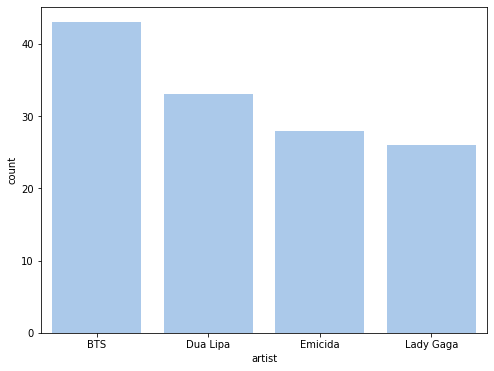

In [86]:
plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(x="artist", y="count", data=artist_count.head(4),
            label="Total", color="b")
plt.show()

## Música com link mais compartilhado

In [90]:
music_count = df.groupby("music_name").size().reset_index(name='count').sort_values(["count"], ascending=False)
music_count.head()

,music_name,count
4854,You Are The Champions - In Support Of The Covi...,12
3946,So What,10
3681,Roses,8
2367,Levitating,8
598,Blinding Lights,7


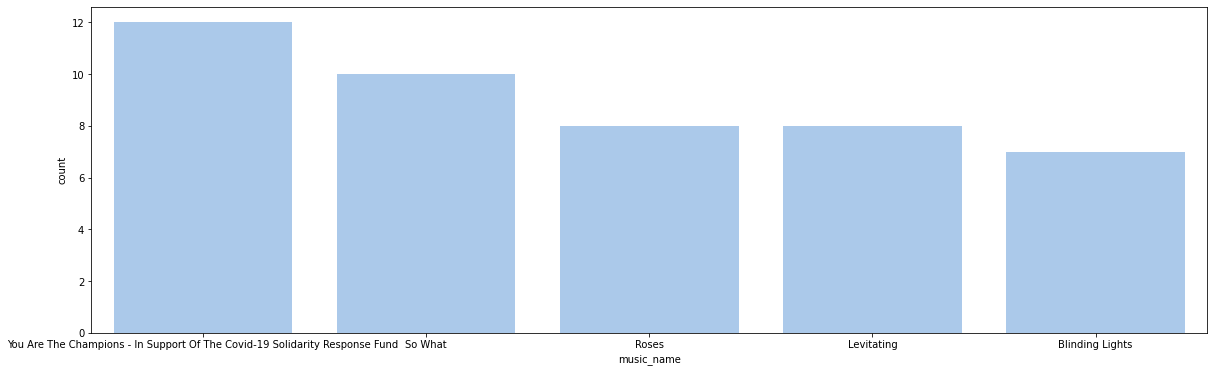

In [97]:
plt.subplots(figsize=(20, 6))

sns.set_color_codes("pastel")
sns.barplot(x="music_name", y="count", data=music_count.head(),
            label="Total", color="b")
plt.show()

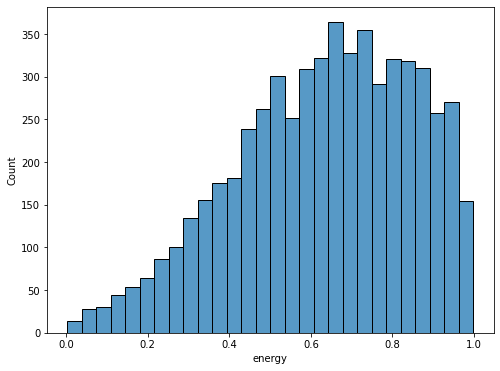

In [104]:
plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.histplot(data=df, x="energy")

plt.show()